# <font color=red>  Personal Loan Campaign Project</font>

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)

%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data

from sklearn.model_selection import train_test_split

# libaries to help with data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns

pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows

pd.set_option("display.max_rows", 200)


# Libraries to build decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models

from sklearn.model_selection import GridSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


<IPython.core.display.Javascript object>

In [2]:
# import dataset "Loan_Modelling.csv"

loan = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data

data = loan.copy()

<IPython.core.display.Javascript object>

## <font color=green>**STRUCTURE OF THE DATA**</font>

In [4]:
# displays the first 5 rows in dataframe

data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

 - There are 14 columns in the dataframe.
 - It can be assumed that there is a minimum of 2 different datatypes in df1:  int64, float64.

In [5]:
# displays the last 5 rows in dataframe

data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [6]:
# To get the same random results (2) every time in data
# 10 rows in random sample 2

np.random.seed(2)
data.sample(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3566,3567,57,33,80,92064,2,2.8,1,0,0,0,0,1,1
4252,4253,54,29,81,91107,1,0.1,3,0,0,0,0,0,0
1918,1919,39,9,118,93555,2,6.0,3,246,1,0,1,1,1
4111,4112,43,17,21,95351,3,1.5,1,0,0,0,0,0,0
1471,1472,52,26,180,94305,1,1.0,1,0,0,0,0,1,1
929,930,55,30,22,92121,1,1.5,2,91,0,0,0,0,1
1916,1917,57,32,64,95138,3,1.6,3,0,0,0,0,1,0
3995,3996,53,28,34,92697,2,0.6,3,0,0,0,0,1,1
1130,1131,58,32,191,94402,1,2.9,1,0,0,0,0,0,0
1723,1724,39,15,55,95821,1,1.5,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [7]:
# determining how many rows and columns in data


data.shape

(5000, 14)

<IPython.core.display.Javascript object>

 - There are 5000 rows and 14 columns in df1

In [8]:
# determining if any duplicate data found in dataframe

data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

 - There is no duplicated data found in data.

In [9]:
# determining the data types of each individual column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

 - Confirmed the data has 2 datatypes:  int64, float64.
 - There are no null values found in the columns.

In [10]:
# Transposed summary of data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

 - We may have outliers in the Income and Mortgage columns.
 - Income and Mortgage are right skewed.
 - We will need to do data pre-processing on the Experience and ZIPCode columns in preparation for modeling.

## <font color=green>**DATA PRE-PROCESSING**</font>

### <font color=blue>**Missing Value Treatment**</font>

In [11]:
# determining the missing values found in each individual column

data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

### <font color=blue>**Pre-processing Zip to City to County**</font>

 - There are no missing values in the dataset.

In [12]:
# import zipcode library for data preprocessing

import uszipcode
from uszipcode import SearchEngine

search = SearchEngine()

<IPython.core.display.Javascript object>

In [13]:
# convert zipcode to city

city = []
for i in np.arange(0, len(data["ZIPCode"])):
    zipcode = search.by_zipcode(data["ZIPCode"][i])
    city.append(zipcode.major_city)

<IPython.core.display.Javascript object>

In [14]:
# first five rows of data

data["City"] = city
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Pasadena
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Berkeley
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Northridge


<IPython.core.display.Javascript object>

In [15]:
# unique values in city column

data.City.nunique()

244

<IPython.core.display.Javascript object>

In [16]:
# value counts in city

data["City"].value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sierra Madre       1
Stinson Beach      1
Tahoe City         1
Ladera Ranch       1
Sausalito          1
Name: City, Length: 244, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
# create output of value counts associated with categorical values, "City"

City_df = data.loc[:, ["City"]].copy()

val_c = City_df.City.value_counts()
val_c

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sierra Madre       1
Stinson Beach      1
Tahoe City         1
Ladera Ranch       1
Sausalito          1
Name: City, Length: 244, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# set value count threshold to 20

threshold = 20
val_c[val_c.values >= threshold]


Los Angeles            375
San Diego              269
San Francisco          257
Berkeley               241
Sacramento             148
Palo Alto              130
Stanford               127
Davis                  121
La Jolla               112
Santa Barbara          103
San Jose                96
Santa Clara             77
Monterey                72
Pasadena                71
Irvine                  58
Oakland                 55
Newbury Park            53
Claremont               52
Menlo Park              52
Santa Cruz              51
El Segundo              50
Northridge              46
Riverside               46
Hayward                 41
Redwood City            37
Los Altos               36
Santa Monica            35
Huntington Beach        35
Livermore               34
Emeryville              34
San Luis Obispo         33
Fallbrook               32
Fremont                 31
Goleta                  31
Cupertino               29
Torrance                28
Carlsbad                28
A

<IPython.core.display.Javascript object>

In [19]:
# list of Cities

City_list = val_c[val_c.values >= threshold].index.tolist()
print("Cities taken into consideration:", len(City_list), City_list)

Cities taken into consideration: 52 ['Los Angeles', 'San Diego', 'San Francisco', 'Berkeley', 'Sacramento', 'Palo Alto', 'Stanford', 'Davis', 'La Jolla', 'Santa Barbara', 'San Jose', 'Santa Clara', 'Monterey', 'Pasadena', 'Irvine', 'Oakland', 'Newbury Park', 'Claremont', 'Menlo Park', 'Santa Cruz', 'El Segundo', 'Northridge', 'Riverside', 'Hayward', 'Redwood City', 'Los Altos', 'Santa Monica', 'Huntington Beach', 'Livermore', 'Emeryville', 'San Luis Obispo', 'Fallbrook', 'Fremont', 'Goleta', 'Cupertino', 'Torrance', 'Carlsbad', 'Arcata', 'Moss Landing', 'Alameda', 'Walnut Creek', 'South San Francisco', 'Roseville', 'Ridgecrest', 'Vallejo', 'Mountain View', 'Santa Clarita', 'Fullerton', 'San Marcos', 'Pomona', 'Mission Viejo', 'Redlands']


<IPython.core.display.Javascript object>

In [20]:
# create a copy of our dataframe

df1 = data.copy()

<IPython.core.display.Javascript object>

In [21]:
# first we will fill missing values in the columns by 'Others'

df1.City.fillna("'Others'", inplace=True)
df1.City.isnull().sum()

0

<IPython.core.display.Javascript object>

In [22]:
# grouping cities by county

LA_County = [
    "Los Angeles",
    "Pasadena",
    "Claremont",
    "El Segundo",
    "Northridge",
    "Santa Monica",
    "Torrance",
    "Santa Clarita",
    "Pomona",
]
San_Diego_County = [
    "San Diego",
    "La Jolla",
    "Fallbrook",
    "Carlsbad",
    "San Marcos",
]
San_Francisco_County = [
    "San Francisco",
]
Alameda_County = [
    "Berkeley", 
    "Oakland", 
    "Hayward", 
    "Emeryville", 
    "Livermore", 
    "Fremont", 
    "Alameda"
]
Sacramento_County = [
    "Sacramento",
]
Santa_Clara_County = [
    "Palo Alto",
    "Stanford",
    "San Jose",
    "Santa Clara",
    "Los Altos",
    "Cupertino",
    "Mountain View",
]
Yolo_County = [
    "Davis",
]
Santa_Barbara_County = [
    "Santa Barbara", 
    "Goleta",
]
Monterey_County = [
    "Monterey",
    "Moss Landing",
]
Orange_County = [
    "Irvine",
    "Huntington Beach",
    "Fullerton",
    "Mission Viejo",
]
Ventura_County = [
    "Newbury Park",
]
San_Matteo_County = [
    "Menlo Park",
    "Redwood City",
    "South San Francisco",
]
Santa_Cruz_County = [
    "Santa Cruz",
]
Riverside_County = [
    "Riverside",
]
San_Luis_Obispo_County = [
    "San Luis Obispo",
]
Conta_Costa_County = [
    "Walnut Creek",
]
Humboldt_County = [
    "Arcata",
]
Ridgecrest_County = [
    "Ridgecrest",
]
Placer_County = [
    "Roseville",
]
Solano_County = [
    "Vallejo",
]
San_Bernardino_County = [
    "Redlands"
]


<IPython.core.display.Javascript object>

In [23]:
# combining regions


def region_combining(x):
    if x in LA_County:
        return "LA_County"
    elif x in San_Diego_County:
        return "San_Diego_County"
    elif x in San_Francisco_County:
        return "San_Franscisco_County"
    elif x in Alameda_County:
        return "Alameda_County"
    elif x in Sacramento_County:
        return "Sacramento_County"
    elif x in Santa_Clara_County:
        return "Santa_Clara_County"
    elif x in Yolo_County:
        return "Yolo_County"
    elif x in Santa_Barbara_County:
        return "Santa_Barbara_County"
    elif x in Monterey_County:
        return "Monterey_County"
    elif x in Orange_County:
        return "Orange_County"
    elif x in Ventura_County:
        return "Ventura_County"
    elif x in San_Matteo_County:
        return "San_Matteo_County"
    elif x in Santa_Cruz_County:
        return "Santa_Cruz_County"
    elif x in Riverside_County:
        return "Riverside_County"
    elif x in San_Luis_Obispo_County:
        return "San_Luis_Obispo_County"
    elif x in Conta_Costa_County:
        return "Conta_Costa_County"
    elif x in Humboldt_County:
        return "Humboldt_County"
    elif x in Ridgecrest_County:
        return "Ridgecrest_County"
    elif x in Placer_County:
        return "Placer_County"
    elif x in Solano_County:
        return "Solano_County"
    elif x in San_Bernardino_County:
        return "San_Bernardino_County"
    else:
        return "Others"

<IPython.core.display.Javascript object>

In [24]:
# apply region combining to city category

df1["City"] = df1["City"].apply(region_combining)

<IPython.core.display.Javascript object>

 - Converted the zip codes to corresponding city.
 - Set value threshold to minimum 20.
 - Fill the missing values with "Others".
 - Group cities by 22 California Counties and apply region combining in preperation for modeling.

In [25]:
# first 20 rows of data

df1.head(20)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,LA_County
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,LA_County
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda_County
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San_Franscisco_County
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,LA_County
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San_Diego_County
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,LA_County
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey_County
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,LA_County
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,Others


<IPython.core.display.Javascript object>

### <font color=blue>**Analyzing Value Counts**</font>

In [26]:
# unique values in city

print("Distinct values in City column:", df1.City.nunique())

Distinct values in City column: 22


<IPython.core.display.Javascript object>

 - There are 22 value counts in the column, "City"

In [27]:
# value counts in city

df1["City"].value_counts()

Others                    1533
LA_County                  700
Santa_Clara_County         517
Alameda_County             462
San_Diego_County           462
San_Franscisco_County      257
Sacramento_County          148
Santa_Barbara_County       134
Orange_County              134
Yolo_County                121
San_Matteo_County          112
Monterey_County             98
Ventura_County              53
Santa_Cruz_County           51
Riverside_County            46
San_Luis_Obispo_County      33
Humboldt_County             26
Conta_Costa_County          25
Placer_County               23
Ridgecrest_County           23
Solano_County               22
San_Bernardino_County       20
Name: City, dtype: int64

<IPython.core.display.Javascript object>

 - LA_County, Santa_Clara_County and Others have the most value counts in City.

In [28]:
# datatypes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  City                5000 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

<IPython.core.display.Javascript object>

In [29]:
# drop ZIPCode column

df1.drop("ZIPCode", axis=1, inplace=True)

<IPython.core.display.Javascript object>

 - Dropping ZIPCode column due to newly created Pre-processed "City" column.

In [30]:
# drop ID column

df1.drop("ID", axis=1, inplace=True)

<IPython.core.display.Javascript object>

 - Dropping "id" column as pandas indexing is appropriate.

In [31]:
# first 30 rows in df1

df1.head(30)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City
0,25,1,49,4,1.6,1,0,0,1,0,0,0,LA_County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,LA_County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda_County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San_Franscisco_County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,LA_County
5,37,13,29,4,0.4,2,155,0,0,0,1,0,San_Diego_County
6,53,27,72,2,1.5,2,0,0,0,0,1,0,LA_County
7,50,24,22,1,0.3,3,0,0,0,0,0,1,Monterey_County
8,35,10,81,3,0.6,2,104,0,0,0,1,0,LA_County
9,34,9,180,1,8.9,3,0,1,0,0,0,0,Others


<IPython.core.display.Javascript object>

In [32]:
# Age value counts

df1["Age"].value_counts()

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

 - 35 has the most value counts in column, "Age".
 - 67 has the least value counts in column, "Age"

In [33]:
# experience value counts

df1["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

 - 35 has the most value counts in the column, "Experience".
 - There are rows the have negative numbers for "Experience".  These values must be treated.

### <font color=blue>**Applying Absolute Values**</font>

In [34]:
# setting absolute values for Experience column

df1["Experience"] = df1["Experience"].abs()

<IPython.core.display.Javascript object>

In [35]:
# Experience value counts

df1["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
29    124
22    124
7     121
8     119
15    119
6     119
10    118
33    117
13    117
37    116
11    116
36    114
4     113
21    113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

<IPython.core.display.Javascript object>

 - We have now set absolute values in the "Experience" column eliminating negative values

In [36]:
# income value counts

df1["Income"].value_counts()

44     85
38     84
81     83
41     82
39     81
40     78
42     77
83     74
43     70
45     69
29     67
21     65
85     65
35     65
22     65
25     64
84     63
28     63
30     63
82     61
78     61
55     61
65     60
64     60
32     58
61     57
53     57
80     56
62     55
31     55
58     55
23     54
18     53
59     53
79     53
34     53
54     52
49     52
19     52
60     52
33     51
24     47
20     47
75     47
70     47
52     47
63     46
69     46
74     45
50     45
48     44
73     44
71     43
51     41
72     41
90     38
91     37
93     37
68     35
89     34
113    34
15     33
13     32
14     31
114    30
12     30
92     29
98     28
115    27
11     27
94     26
88     26
112    26
9      26
95     25
122    24
141    24
101    24
128    24
99     24
8      23
10     23
129    23
145    23
125    23
111    22
154    21
104    20
134    20
105    20
121    20
149    20
155    19
140    19
130    19
110    19
118    19
131    19
135    18
123    18


<IPython.core.display.Javascript object>

 - Income value counts range for 1 to 85

In [37]:
# family value counts

df1["Family"].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

<IPython.core.display.Javascript object>

 - Family size of customer ranges from 1472 at 1 member to 1010 at 3 members.

In [38]:
# CCAvg value counts

df1["CCAvg"].value_counts()

0.30     241
1.00     231
0.20     204
2.00     188
0.80     187
0.10     183
0.40     179
1.50     178
0.70     169
0.50     163
1.70     158
1.80     152
1.40     136
2.20     130
1.30     128
0.60     118
2.80     110
2.50     107
0.00     106
1.90     106
0.90     106
1.60     101
2.10     100
2.40      92
2.60      87
1.10      84
1.20      66
2.30      58
2.70      58
2.90      54
3.00      53
3.30      45
3.80      43
3.40      39
2.67      36
4.00      33
4.50      29
3.60      27
3.90      27
4.30      26
6.00      26
3.70      25
4.70      24
3.20      22
4.10      22
4.90      22
3.10      20
0.67      18
1.67      18
5.00      18
2.33      18
5.40      18
6.50      18
4.40      17
5.20      16
3.50      15
4.60      14
6.10      14
6.90      14
7.00      14
7.20      13
7.40      13
5.70      13
6.30      13
8.00      12
7.50      12
4.20      11
6.33      10
8.10      10
7.30      10
6.80      10
8.80       9
6.70       9
6.67       9
7.60       9
7.80       9
4.33       9

<IPython.core.display.Javascript object>

 - Value counts for average credit card spending per month in thousands.

In [39]:
# Education Value Counts

df1["Education"].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

<IPython.core.display.Javascript object>

 - There are 2096 value counts for Undergrad, 1501 for Advanced/Professional and 1403 for Graduate.

In [40]:
# Mortgage value counts

df1["Mortgage"].value_counts()

0      3462
98       17
89       16
91       16
83       16
       ... 
206       1
210       1
258       1
278       1
635       1
Name: Mortgage, Length: 347, dtype: int64

<IPython.core.display.Javascript object>

 - Value counts for house mortgage in thousands.

In [41]:
# Personal_Loan value counts

df1["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

<IPython.core.display.Javascript object>

 - 480 customers accepted a personal loan in the past

In [42]:
# securities_account value counts

df1["Securities_Account"].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

<IPython.core.display.Javascript object>

 - 522 customers have a securities account with bank.

In [43]:
# CD_Account value counts

df1["CD_Account"].value_counts()

0    4698
1     302
Name: CD_Account, dtype: int64

<IPython.core.display.Javascript object>

 - 302 customers have CD accounts with the bank.

In [44]:
# Online value counts

df1["Online"].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

<IPython.core.display.Javascript object>

 - 2984 customers use online banking features.

In [45]:
# CreditCard value counts

df1["CreditCard"].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

<IPython.core.display.Javascript object>

 - 1470 customers use credit card from banks other than All Life Bank.

In [46]:
# checking for missing values in df1

df1.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
dtype: int64

<IPython.core.display.Javascript object>

 - Confirming no missing values.

## <font color=green>**Exploratory Data Analysis**</font>

### <font color=blue>**Univariate Analysis**</font>

In [47]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

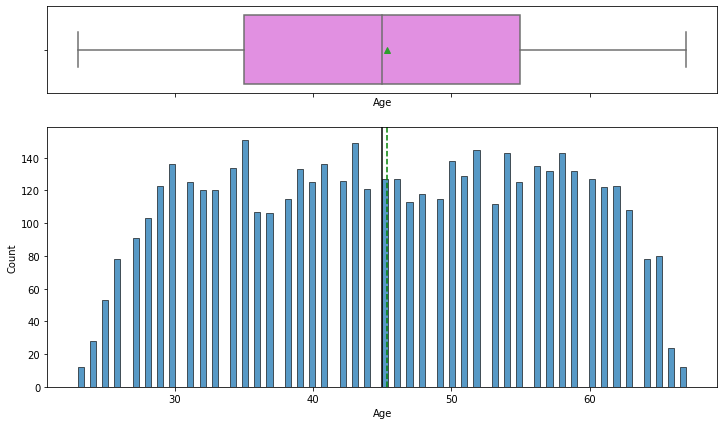

<IPython.core.display.Javascript object>

In [48]:
# creating histogram and box plot of df1 numerical column "Age"

histogram_boxplot(df1, "Age", bins=100)

 - Visual interpretation shows no outliers.
 - Age is evenly distributed.

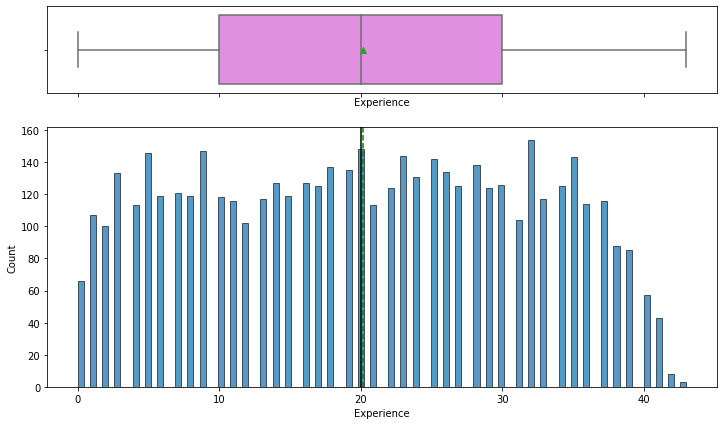

<IPython.core.display.Javascript object>

In [49]:
# creating histogram and box plot of df1 numerical column "Experience"

histogram_boxplot(df1, "Experience", bins=100)

 - Visual interpretation shows no outliers.
 - Experience is evenly distributed.

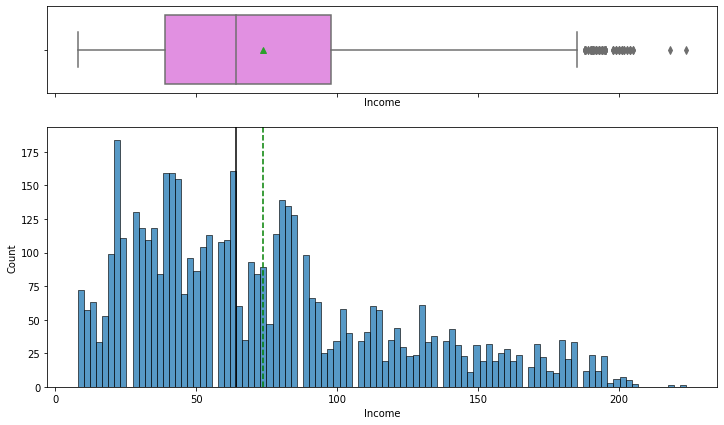

<IPython.core.display.Javascript object>

In [50]:
# creating histogram and box plot of df1 numerical column "Income"

histogram_boxplot(df1, "Income", bins=100)

 - Visual interpretation shows possible outliers.
 - Income is right skewed.

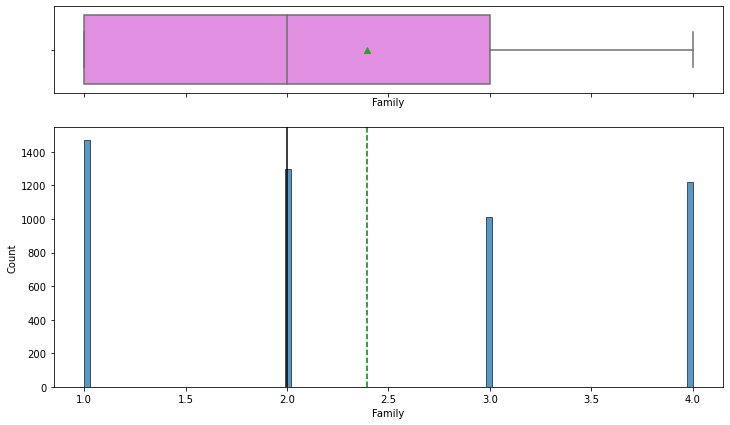

<IPython.core.display.Javascript object>

In [51]:
# creating histogram and box plot of df1 numerical column "Family"

histogram_boxplot(df1, "Family", bins=100)

 - Visual interpretation shows no outliers.
 - Family is evenly distributed.

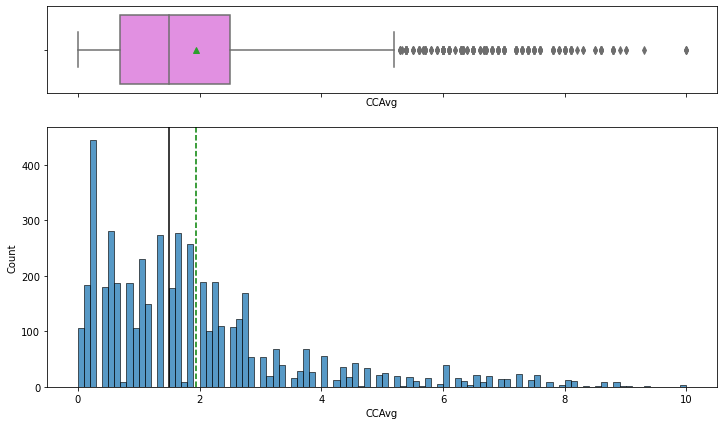

<IPython.core.display.Javascript object>

In [52]:
# creating histogram and box plot of df1 numerical column "CCavg"

histogram_boxplot(df1, "CCAvg", bins=100)

 - Visual interpretation shows possible outliers.
 - CCAvg is right skewed.

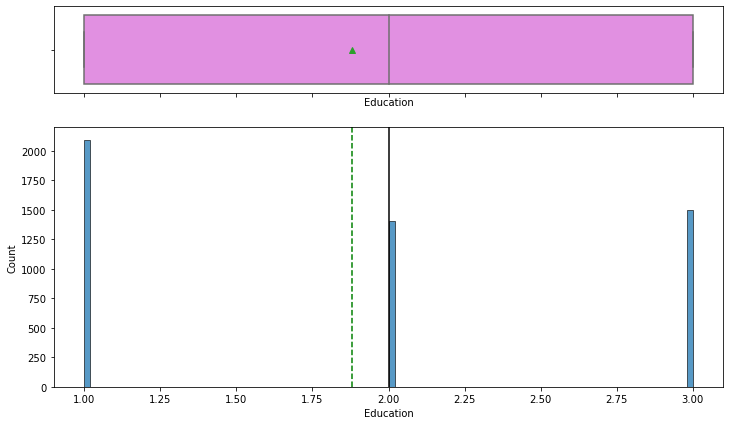

<IPython.core.display.Javascript object>

In [53]:
# creating histogram and box plot of df1 numerical column "Education"

histogram_boxplot(df1, "Education", bins=100)

 - Visual interpretation shows no outliers.
 - Education is evenly distributed.

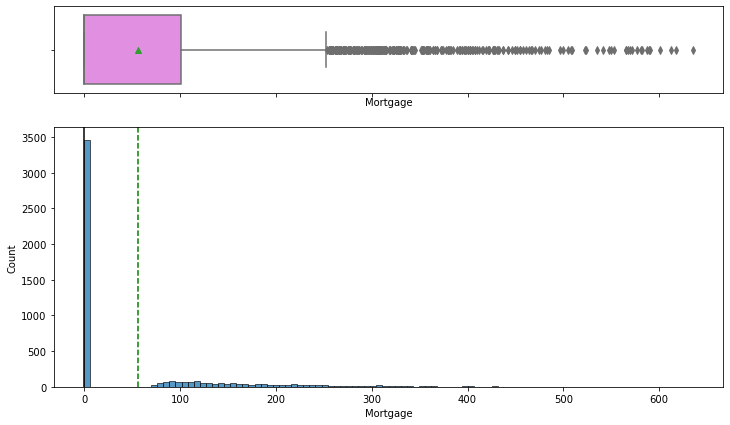

<IPython.core.display.Javascript object>

In [54]:
# creating histogram and box plot of df1 numerical column "Mortgage"

histogram_boxplot(df1, "Mortgage", bins=100)

 - Visual interpretation shows possible outliers.
 - Mortgage is right skewed.

In [55]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

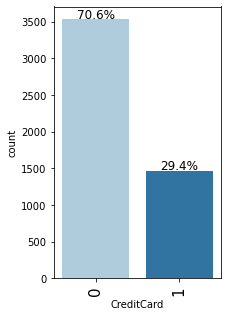

<IPython.core.display.Javascript object>

In [56]:
# creating barplot of df1 catergory "CreditCard"

labeled_barplot(df1, "CreditCard", perc=True)

 - 29.4% of customers have a credit card from a bank outside of All Life.

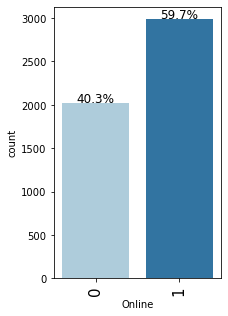

<IPython.core.display.Javascript object>

In [57]:
# creating barplot of df1 catergory "Online"

labeled_barplot(df1, "Online", perc=True)

 - 59.7% of customers use online banking features.

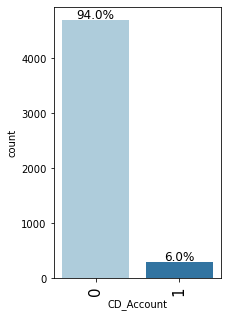

<IPython.core.display.Javascript object>

In [58]:
# creating barplot of df1 catergory "CD_Account"

labeled_barplot(df1, "CD_Account", perc=True)

 - 6.0% of customers have a CD account with bank.

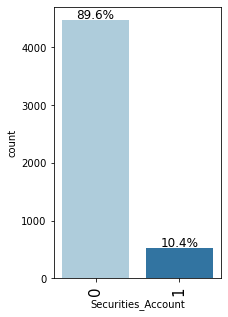

<IPython.core.display.Javascript object>

In [59]:
# creating barplot of df1 catergory "Securities_Account"

labeled_barplot(df1, "Securities_Account", perc=True)

 - 10.4% of customers have a sercurities account with bank.

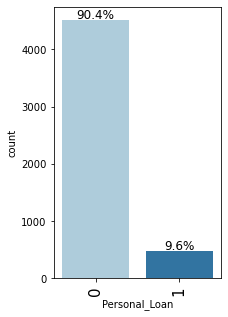

<IPython.core.display.Javascript object>

In [60]:
# creating barplot of df1 catergory "Personal_Loan"

labeled_barplot(df1, "Personal_Loan", perc=True)

 - 9.6% of customers accepted a personal loan in last campaign.

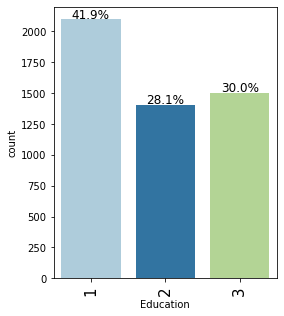

<IPython.core.display.Javascript object>

In [61]:
# creating barplot of df1 catergory "Education"

labeled_barplot(df1, "Education", perc=True)

 - 41.9% of customers have an undergrade degree, 28.1% graduate degree, and 30% have advanced/professional.

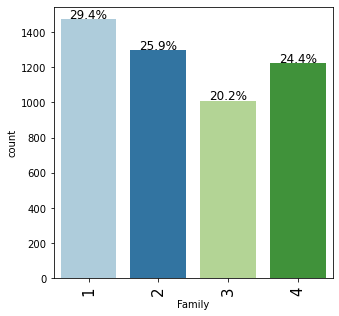

<IPython.core.display.Javascript object>

In [62]:
# creating barplot of df1 catergory "Family"

labeled_barplot(df1, "Family", perc=True)

 - 29.4% of customers have 1 family member, 25.9% have 2 family members, 20.2% have 3 family members, and 24.4% have 4 family members.

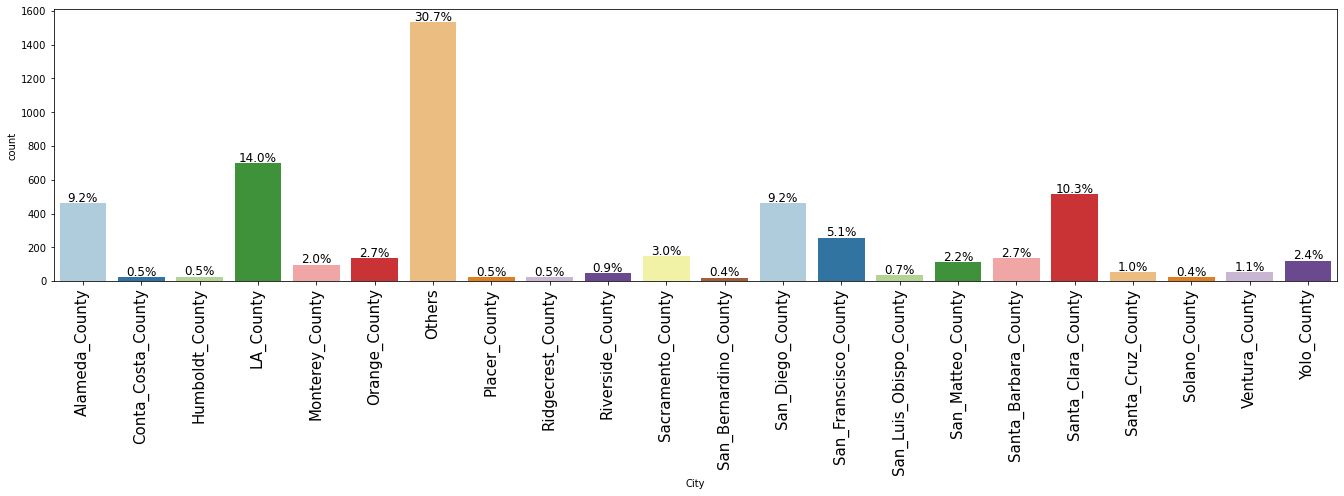

<IPython.core.display.Javascript object>

In [63]:
# creating barplot of df1 catergory "City"

labeled_barplot(df1, "City", perc=True)

 - Others, LA_County, Alameda_County, San_Diego_County, and Santa_Clara_County are where most customers reside.

### <font color=blue>**Bivariate Analysis**</font>

In [64]:
# correlation between numerical columns

correlation = df1.corr()
correlation

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<IPython.core.display.Javascript object>

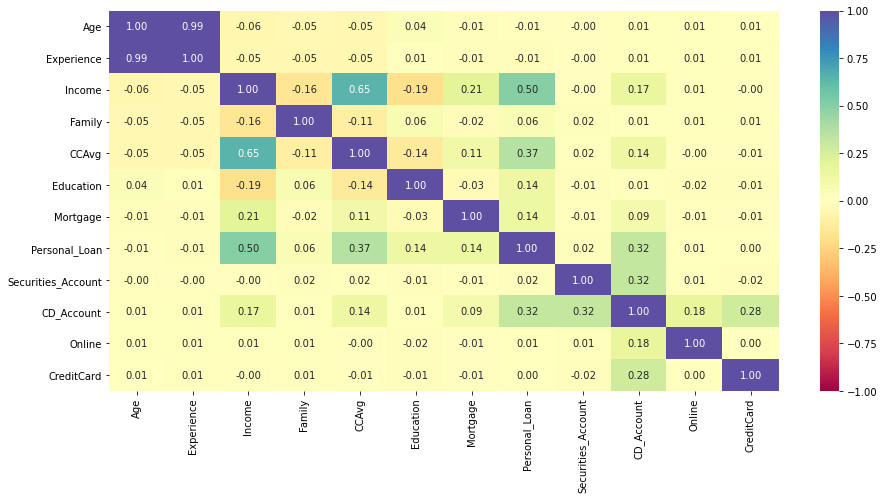

<IPython.core.display.Javascript object>

In [65]:
# heatmap of columns

plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

 - There is a high correlation between "Age" and "Experience".  As one value increases, so will the other.
 - There is a high correlation between "Income" and "CCAvg".  As one value increases, so will the other.
 - There is a somewhat high correlation between "Personal_Loan" and "Income".  As one value increases, so will the other.
 - There is a negative correlation between "Education" and "Income".  
 - There is a negative correlation between "Family" and "Income".

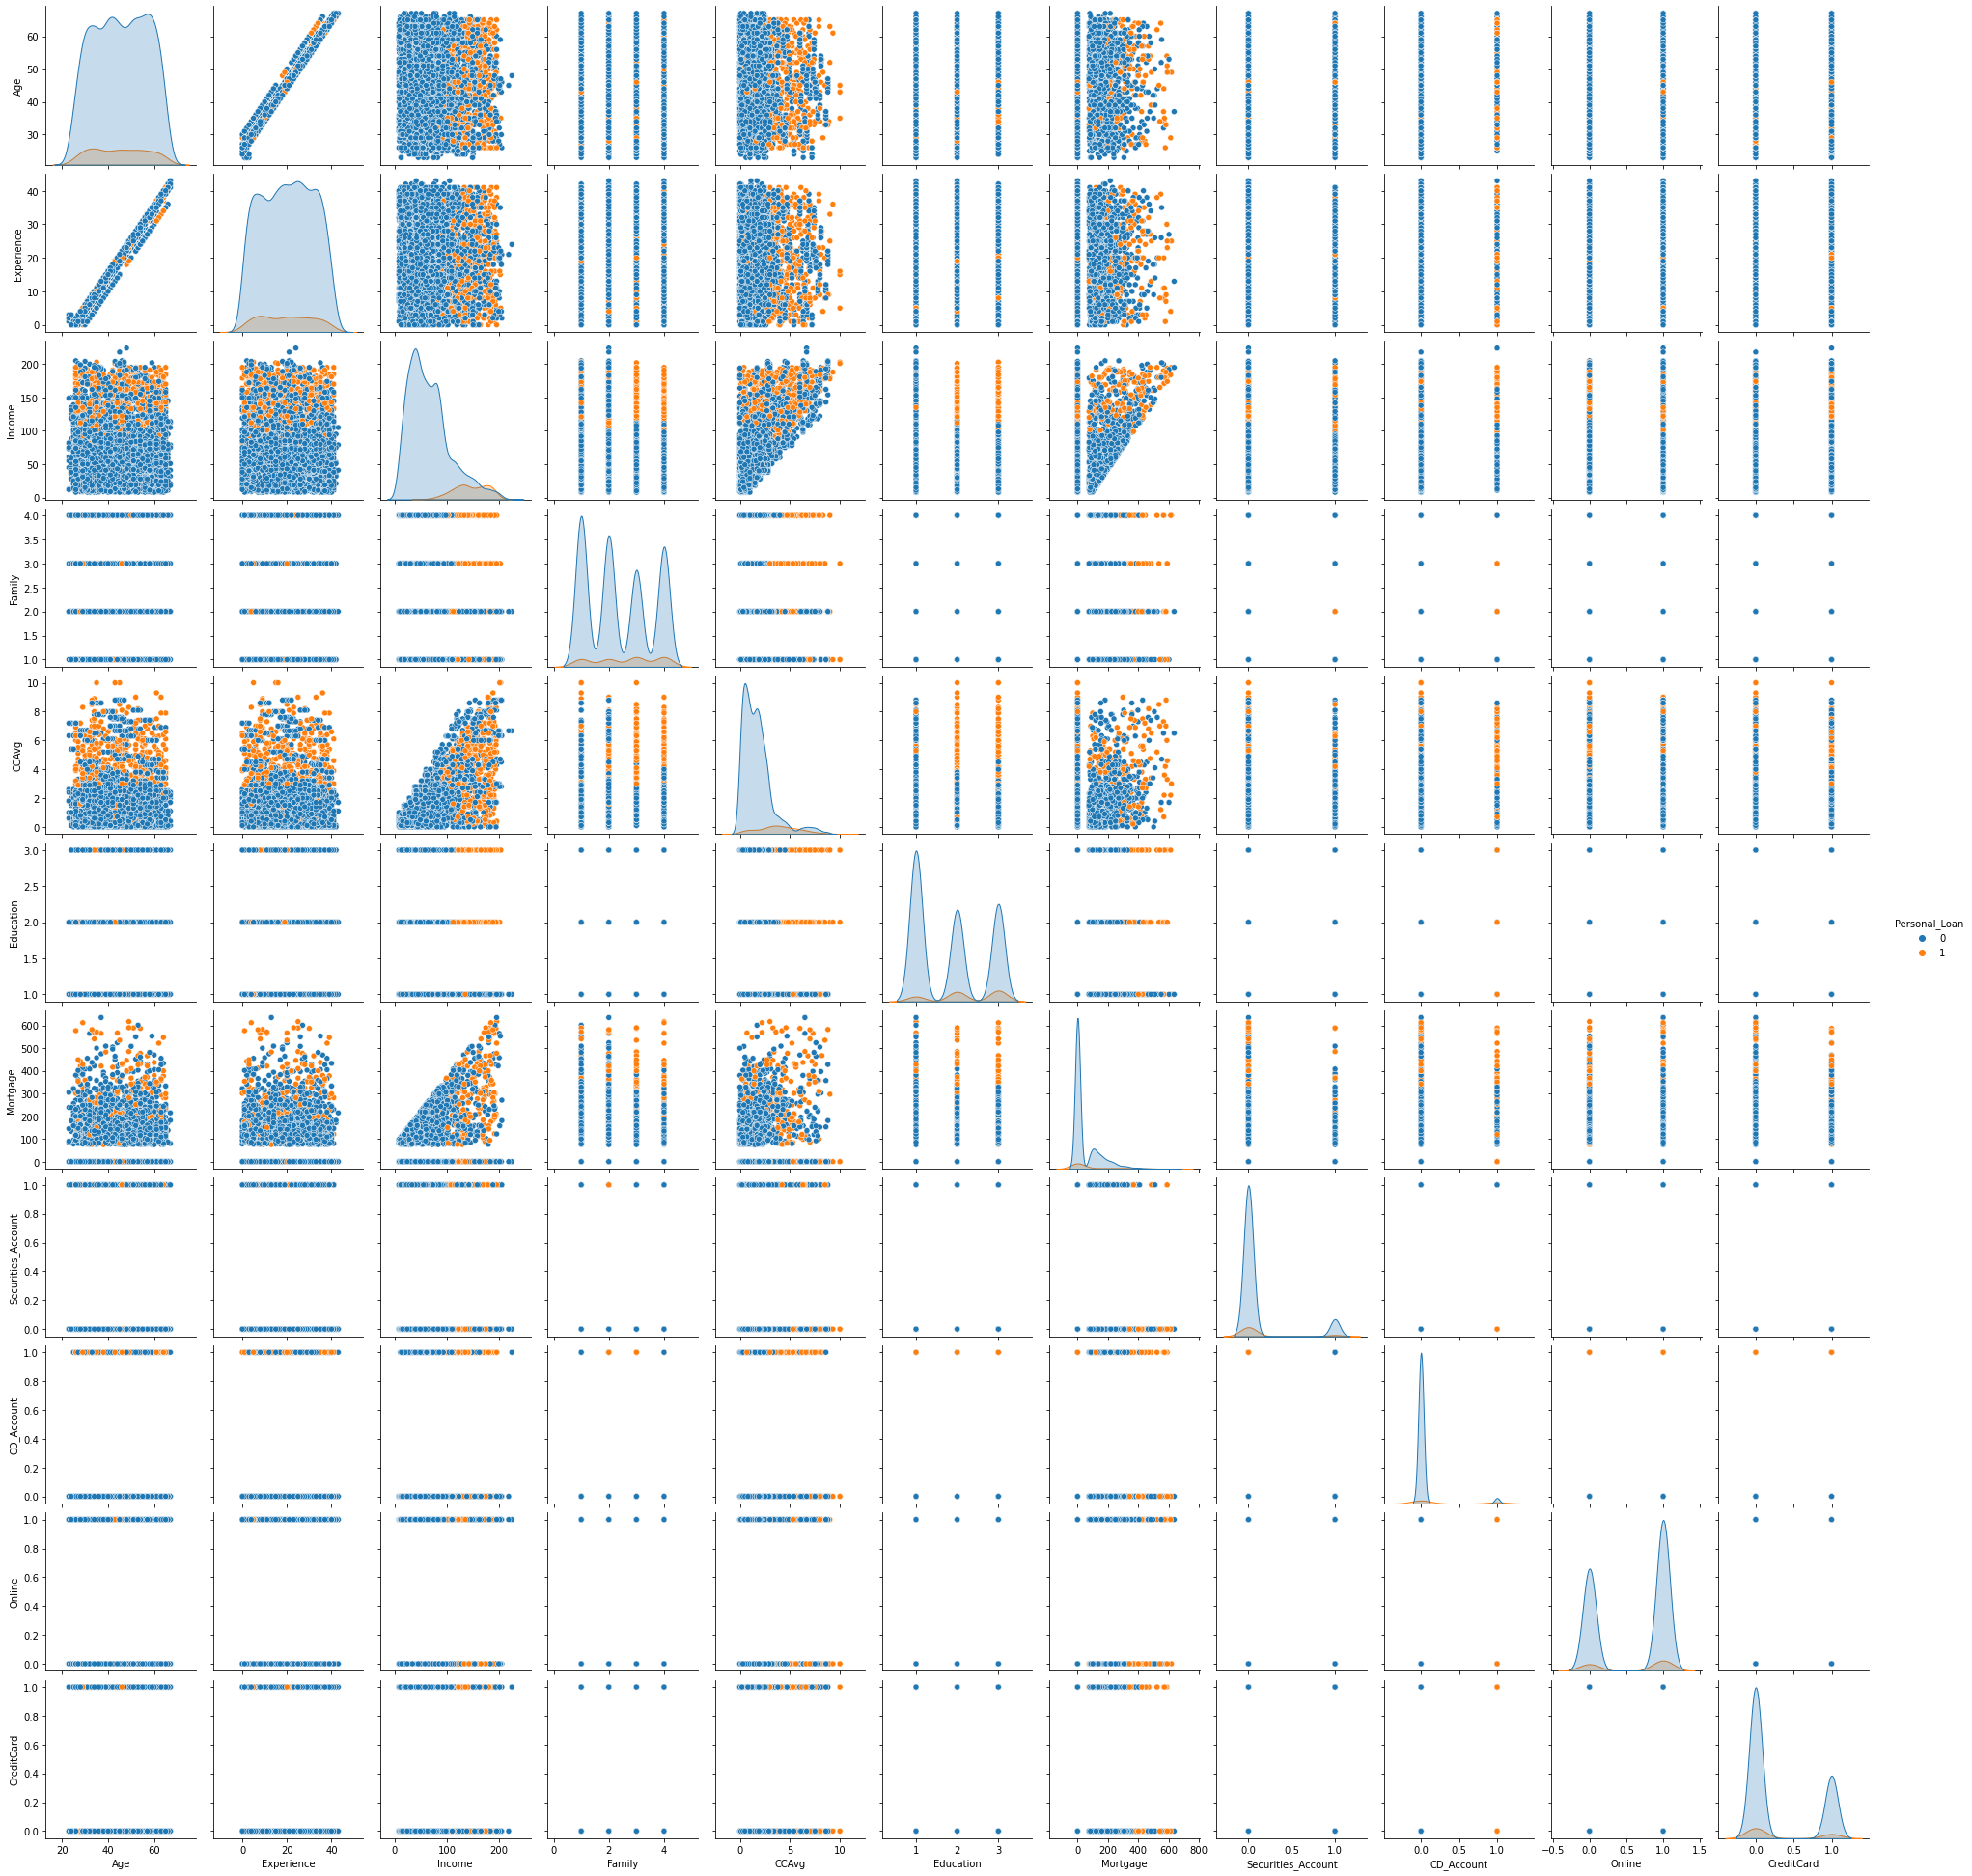

<IPython.core.display.Javascript object>

In [66]:
# pairplot for bivariate analysis on numerical columns

sns.pairplot(data=df1, hue="Personal_Loan")
plt.show()

In [67]:
# define stacked barplot for bivariate analysis


def stacked_barplot(df1, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df1[predictor].nunique()
    sorter = df1[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], df1[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df1[predictor], df1[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


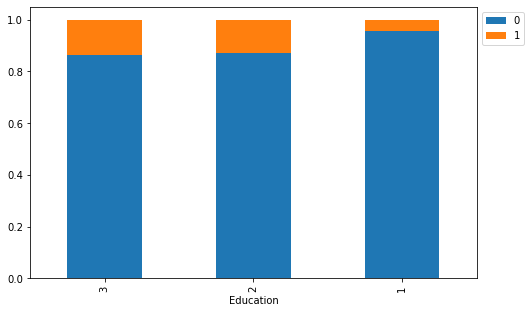

<IPython.core.display.Javascript object>

In [68]:
# stacked barplot of education and personal_loan

stacked_barplot(df1, "Education", "Personal_Loan")

 - Relative to the other 2 education levels, customers with Advanced/Professional education tend to accept for the personal loan most often.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


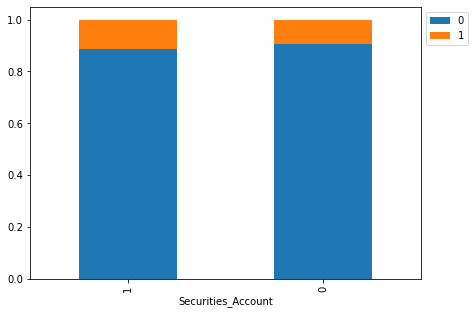

<IPython.core.display.Javascript object>

In [69]:
# stacked barplot of securities_account and personal_loan

stacked_barplot(df1, "Securities_Account", "Personal_Loan")

 - By a small margin, customers with bank security accounts tend to accept the personal most often.

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


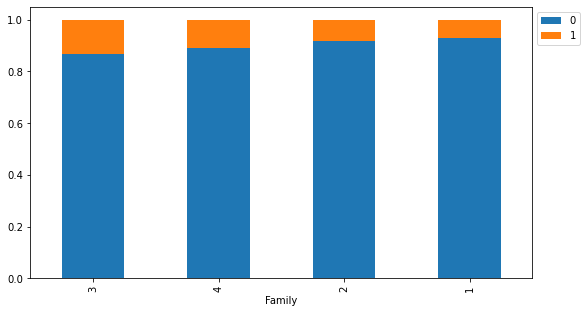

<IPython.core.display.Javascript object>

In [70]:
# stacked barplot of family and personal_loan

stacked_barplot(df1, "Family", "Personal_Loan")

 - Customers with 3 family members accept the personal loans most often compared with 1, 2, and 4 members.

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


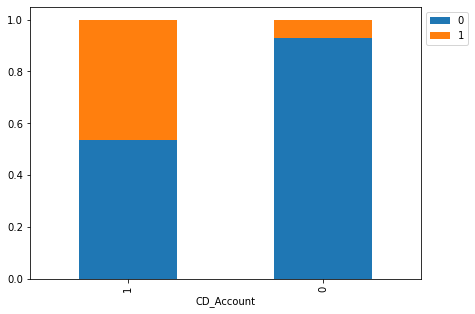

<IPython.core.display.Javascript object>

In [71]:
# stacked barplot of cd_account and personal_loan

stacked_barplot(df1, "CD_Account", "Personal_Loan")

 - Customers with bank CD accounts tend to accept personal loan by a wide margin.

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


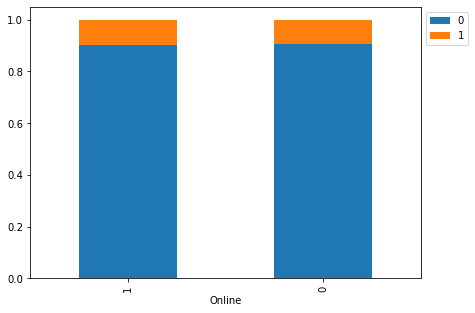

<IPython.core.display.Javascript object>

In [72]:
# stacked barplot of online and personal_loan

stacked_barplot(df1, "Online", "Personal_Loan")

 - Visual interpreting that online banking is not a big factor in whether a customer will accept a personal loan or not.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


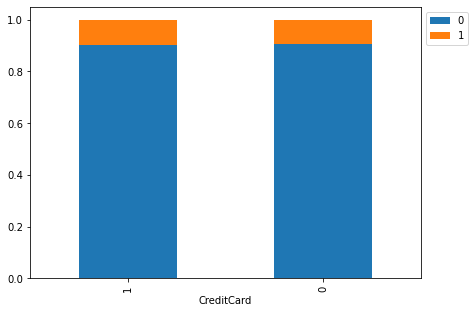

<IPython.core.display.Javascript object>

In [73]:
# stacked barplot of creditcard and personal_loan

stacked_barplot(df1, "CreditCard", "Personal_Loan")

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

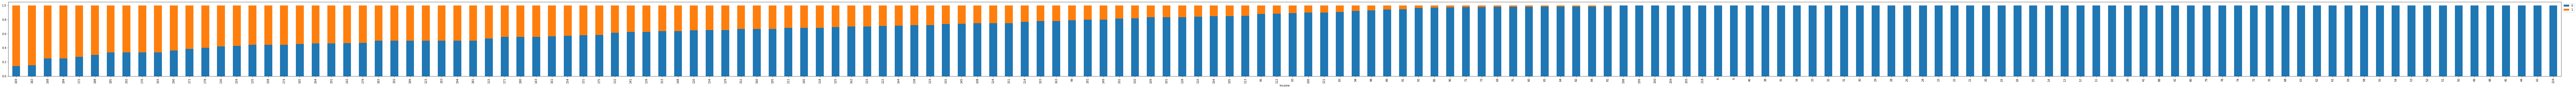

<IPython.core.display.Javascript object>

In [74]:
# stacked barplot of income and personal_loan

stacked_barplot(df1, "Income", "Personal_Loan")

 - Income does have a positive correlation on whether cusotmer will accept personal loan.
 - Visual interpreting a credit card issued by bank other than All Life is not a big factor in whether a customer will accept a personal loan or not.

In [75]:
# function to plot distributions with respect to target


def distribution_plot_wrt_target(df1, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df1[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df1[df1[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df1[df1[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df1, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df1,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

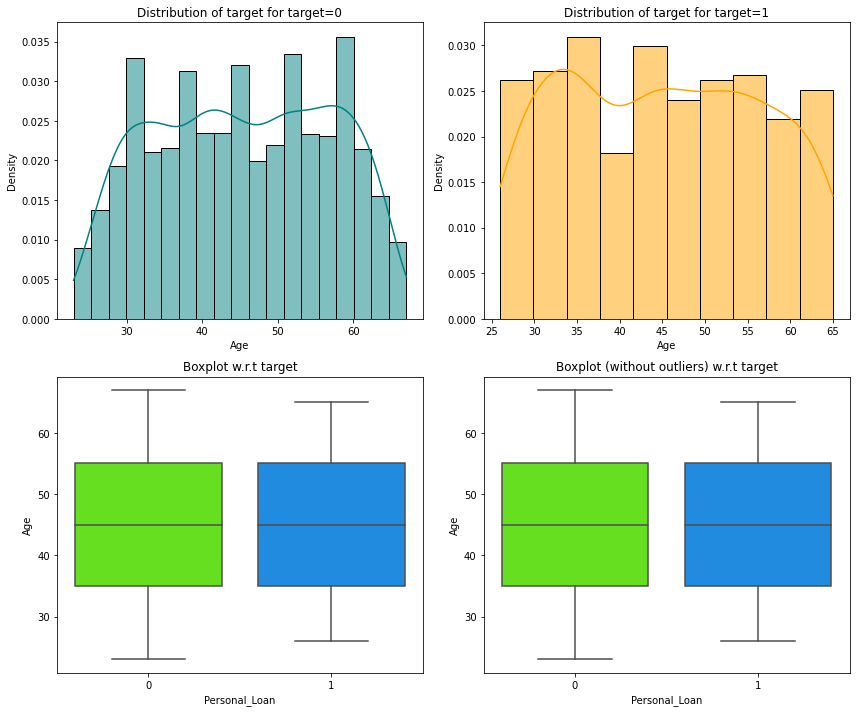

<IPython.core.display.Javascript object>

In [76]:
# df1 distribution plot of columns Age and Personal_Loan

distribution_plot_wrt_target(df1, "Age", "Personal_Loan")

 - There is a even distribution in Age with respect to Personal_Loan.

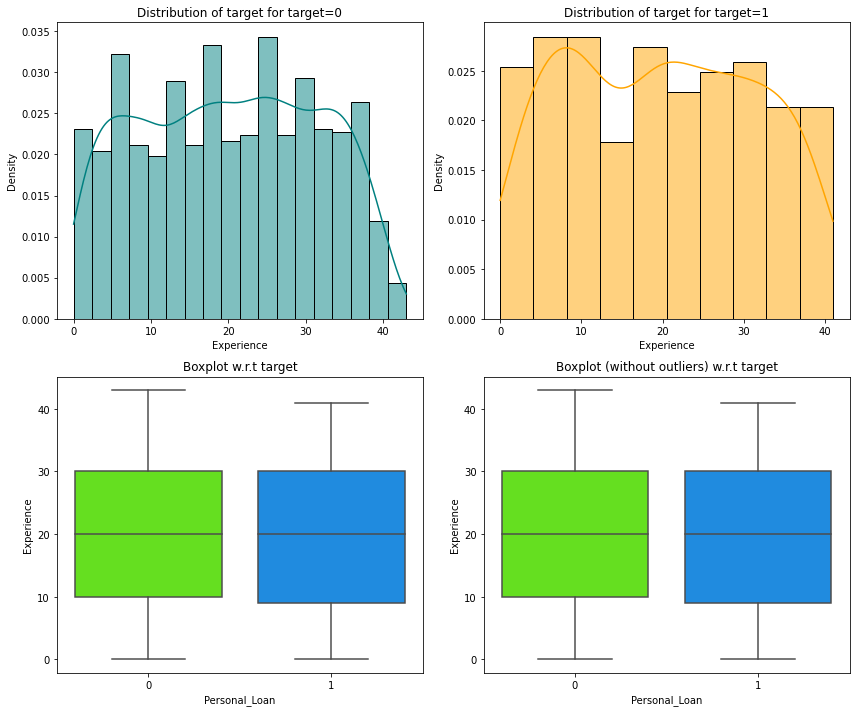

<IPython.core.display.Javascript object>

In [77]:
# df1 distribution plot of columns Experience and Personal_Loan

distribution_plot_wrt_target(df1, "Experience", "Personal_Loan")

 - There is a even distribution in Experience with respect to Personal_Loan.

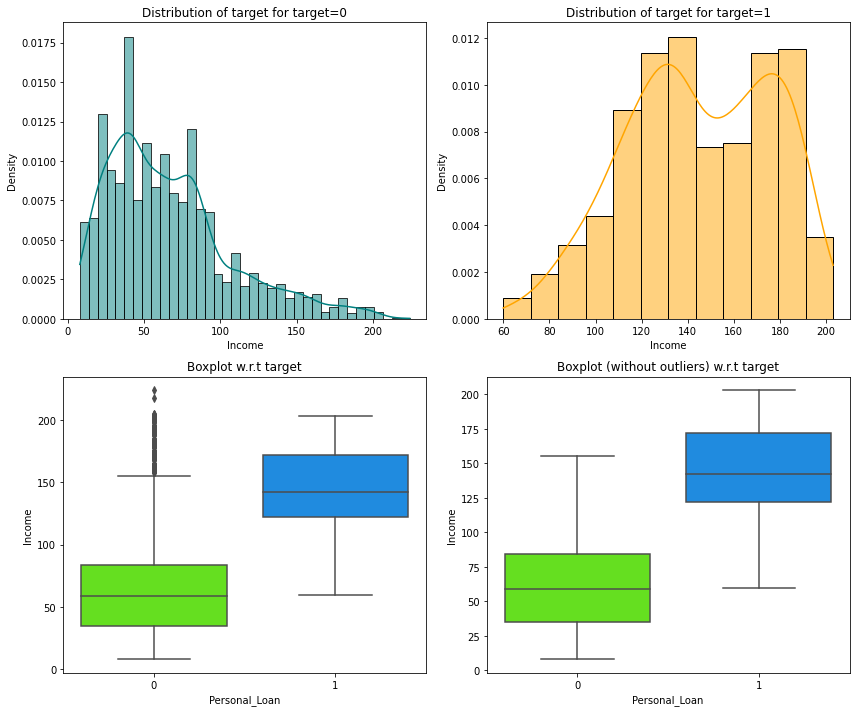

<IPython.core.display.Javascript object>

In [78]:
# df1 distribution plot of columns Income and Personal_Loan

distribution_plot_wrt_target(df1, "Income", "Personal_Loan")

 - Customers who have an income less than 100 are lest likely to accept personal loan.
 - Customers who have an income greater than 110 are more likely to accept loan.

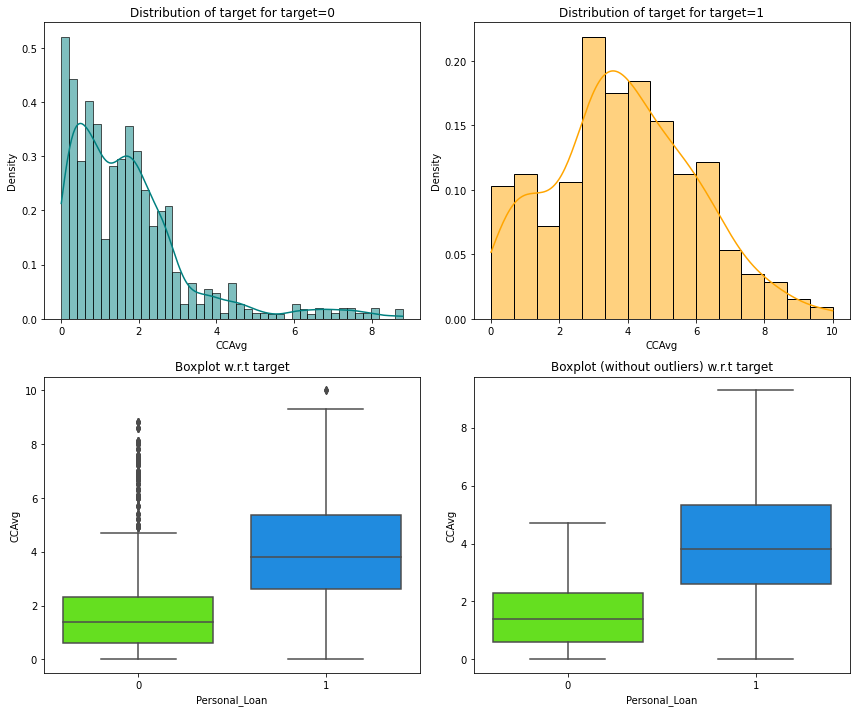

<IPython.core.display.Javascript object>

In [79]:
# df1 distribution plot of columns CCAvg and Personal_Loan

distribution_plot_wrt_target(df1, "CCAvg", "Personal_Loan")

 - Customers who dont accept personal loan have an average credit card spending between 0 and 2k.
 - Customers who do accept personal loan have an average credit card spending between 3k and 6k.

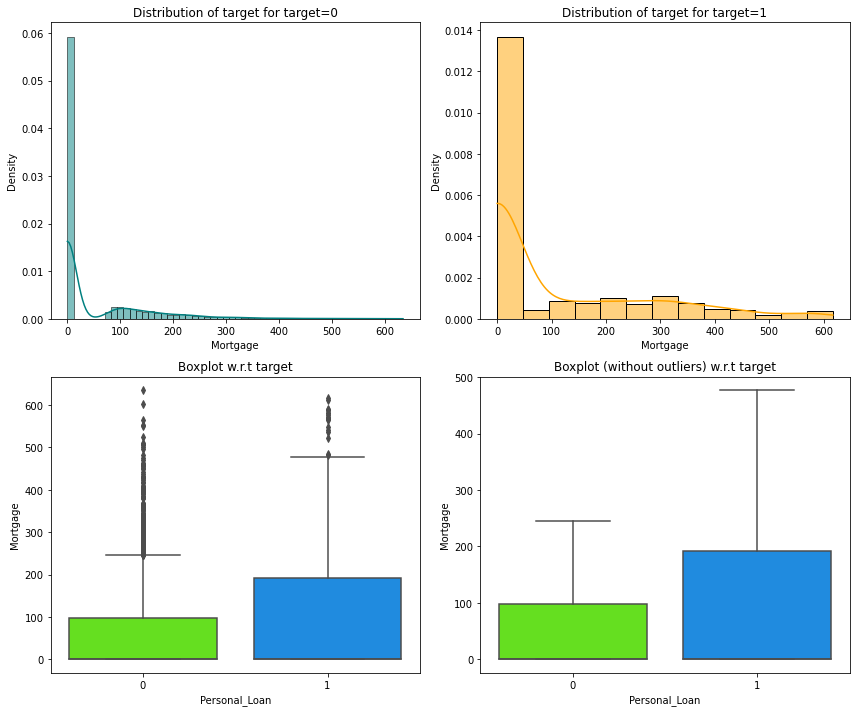

<IPython.core.display.Javascript object>

In [80]:
# df1 distribution plot of columns Mortgage and Personal_Loan

distribution_plot_wrt_target(df1, "Mortgage", "Personal_Loan")

 - The majority of customers who will and wont accept personal loan dont have mortgage.
 - Excluding those customers who dont have mortgage, the data is pretty evenly distributed.

### <font color=blue>**Outlier Treatment**</font>

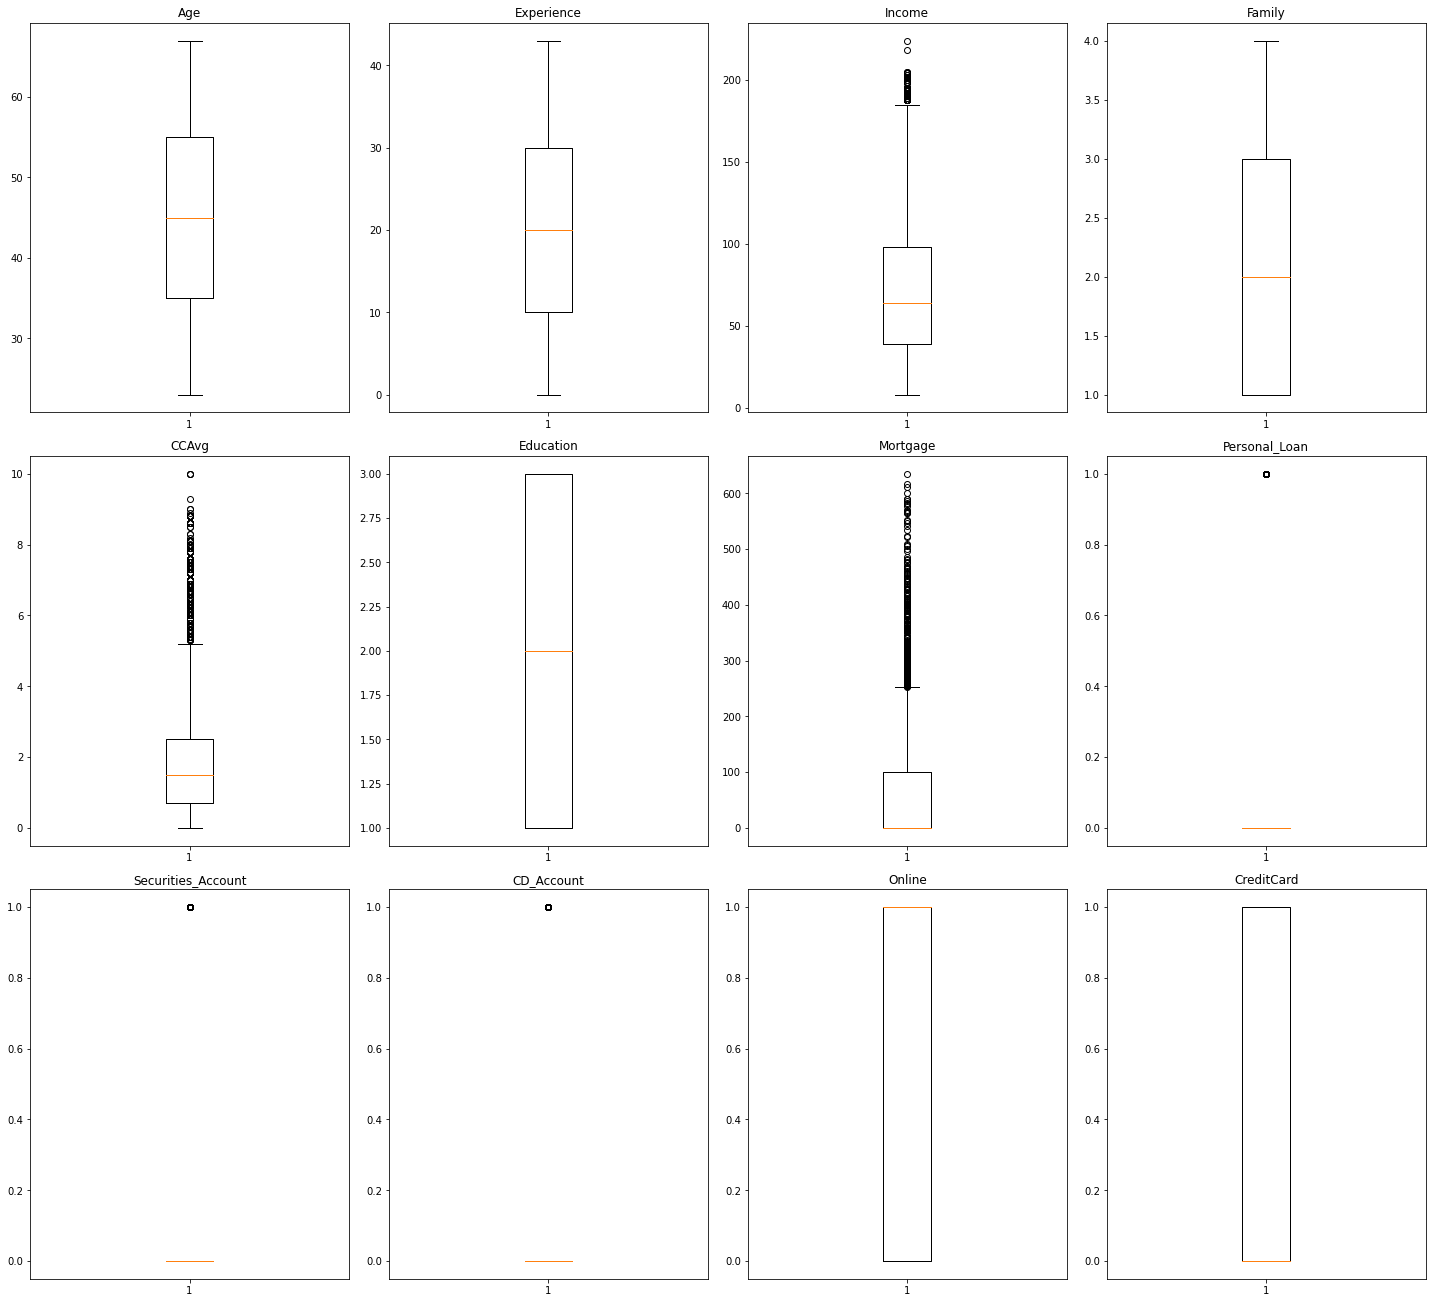

<IPython.core.display.Javascript object>

In [81]:
# checking for outliers using boxplot

numerical_col = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [82]:
# determine outliers = 4 * iqr median of Income

quartiles = np.quantile(df1["Income"][df1["Income"].notnull()], [0.25, 0.75])
Income_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Income_4iqr}")

outlier_Income = df1.loc[
    np.abs(df1["Income"] - df1["Income"].median()) > Income_4iqr, "Income"
]
outlier_Income

Q1 = 39.0, Q3 = 98.0, 4*IQR = 236.0


Series([], Name: Income, dtype: int64)

<IPython.core.display.Javascript object>

 - Using 4 * iqr method, there are no outliers found in the Income column.

In [83]:
# determine outliers = 4 * iqr median of CCAvg

quartiles = np.quantile(df1["CCAvg"][df1["CCAvg"].notnull()], [0.25, 0.75])
CCAvg_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {CCAvg_4iqr}")

outlier_CCAvg = df1.loc[
    np.abs(df1["CCAvg"] - df1["CCAvg"].median()) > CCAvg_4iqr, "CCAvg"
]
outlier_CCAvg

Q1 = 0.7, Q3 = 2.5, 4*IQR = 7.2


9        8.9
787     10.0
881      8.8
917      8.8
1277     8.8
1339     9.0
2101    10.0
2337    10.0
2447     8.8
2769     8.8
2988     8.8
3312     8.8
3804     8.8
3822     9.0
3943     9.3
4225     8.8
Name: CCAvg, dtype: float64

<IPython.core.display.Javascript object>

In [84]:
# dropping outliers in CCAvg

df1.drop(outlier_CCAvg.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

 - Using 4 * iqr method, dropping outliers that were found in the CCAvg column.

In [85]:
# determine outliers = 4 * iqr median of Mortgage

quartiles = np.quantile(df1["Mortgage"][df1["Mortgage"].notnull()], [0.25, 0.75])
Mortgage_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Mortgage_4iqr}")

outlier_Mortgage = df1.loc[
    np.abs(df1["Mortgage"] - df1["Mortgage"].median()) > Mortgage_4iqr, "Mortgage"
]
outlier_Mortgage

Q1 = 0.0, Q3 = 101.0, 4*IQR = 404.0


42      412
59      455
303     617
354     419
365     466
459     458
473     547
479     470
570     485
684     449
782     587
952     524
1111    442
1167    475
1273    437
1359    433
1372    483
1623    455
1674    421
1716    565
1783    601
1789    567
1937    589
2041    535
2217    446
2319    422
2382    428
2394    505
2443    422
2541    569
2653    408
2668    406
2687    452
2714    432
2753    477
2812    467
2841    565
2934    635
2946    437
2956    522
2989    496
3012    415
3021    461
3357    408
3373    442
3411    427
3470    429
3472    431
3515    508
3571    416
3608    553
3662    500
3702    410
3776    449
3945    428
4016    427
4238    464
4240    509
4294    481
4345    577
4422    422
4541    405
4585    571
4655    581
4672    550
4812    612
4842    590
4859    541
Name: Mortgage, dtype: int64

<IPython.core.display.Javascript object>

In [86]:
# dropping outliers in Mortgage

df1.drop(outlier_Mortgage.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

 - Using 4 * iqr method, dropping outliers that were found in the Mortgage column.

In [87]:
# shape of data, 4916 rows and 13 columns

df1.shape

(4916, 13)

<IPython.core.display.Javascript object>

 - Updated shape of df1 after outliers have been treated.
 - There are 4916 rows and 13 columns.

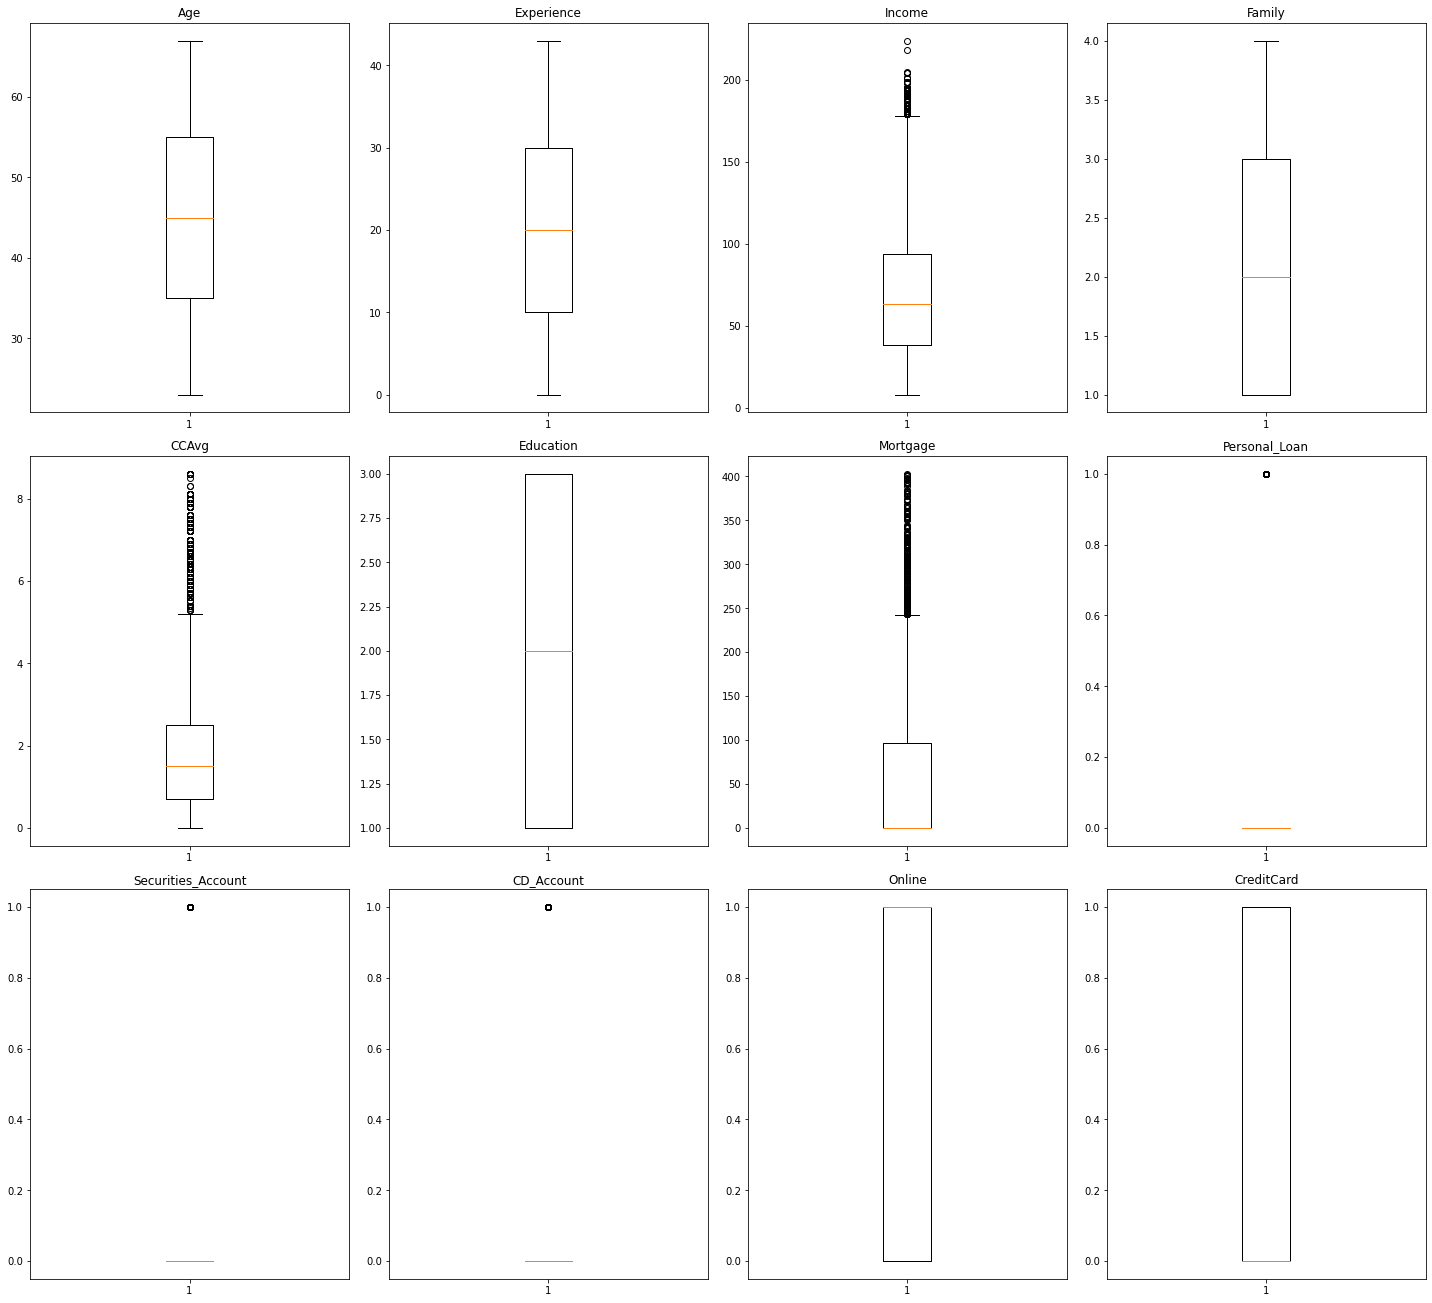

<IPython.core.display.Javascript object>

In [88]:
# let's look at box plot to see if outliers have been treated or not

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## <font color=Orange>**Summary of EDA**</font>

### <font color=Brown>**Description of Data:**</font>

- There are 0 duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either int64 or float64.
- ZIPCodes column was converted to from zip codes to city.  After conversion to city, the individual cities were grouped by county.

### <font color=Brown>**Observations:**</font>

 - There is a high correlation between "Age" and "Experience".  As one value increases, so will the other.
 - There is a high correlation between "Income" and "CCAvg".  As one value increases, so will the other.
 - There is a somewhat high correlation between "Personal_Loan" and "Income".  As one value increases, so will the other.
 - There is a negative correlation between "Education" and "Income".  
 - There is a negative correlation between "Family" and "Income".
 - Outliers discovered in CCAvg and Mortgage using the 4 * iqr method.  The rows with outliers have been dropped.
 - Customers who have an income less than 100 are lest likely to accept personal loan.
 - Customers who have an income greater than 110 are more likely to accept loan.
 - Customers who dont accept personal loan have an average credit card spending between 0 and 2k.
 - Customers who do accept personal loan have an average credit card spending between 3k and 6k.
 - There is a even distribution in Experience with respect to Personal_Loan.

## <font color=green>**MODEL BUILDING - LOGISTIC REGRESSION**</font>

In [89]:
# boolean counts for Personal_Loan

n_true = len(df1.loc[df1["Personal_Loan"] == True])
n_false = len(df1.loc[df1["Personal_Loan"] == False])
print(
    "Number of true cases: {0} ({1:2.2f}%)".format(
        n_true, (n_true / (n_true + n_false)) * 100
    )
)
print(
    "Number of false cases: {0} ({1:2.2f}%)".format(
        n_false, (n_false / (n_true + n_false)) * 100
    )
)

Number of true cases: 437 (8.89%)
Number of false cases: 4479 (91.11%)


<IPython.core.display.Javascript object>

 - 8.89% of customers accepted the personal loan.

In [90]:
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [91]:
# dropping dependant variable, creating dummy variables

from sklearn.model_selection import train_test_split

X = df1.drop("Personal_Loan", axis=1)  # Predictor feature columns (8 X m)
Y = df1["Personal_Loan"]  # Predicted class (1=True, 0=False) (1 X m)


def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


X = encode_cat_vars(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,City_Conta_Costa_County,City_Humboldt_County,City_LA_County,City_Monterey_County,City_Orange_County,City_Others,City_Placer_County,City_Ridgecrest_County,City_Riverside_County,City_Sacramento_County,City_San_Bernardino_County,City_San_Diego_County,City_San_Franscisco_County,City_San_Luis_Obispo_County,City_San_Matteo_County,City_Santa_Barbara_County,City_Santa_Clara_County,City_Santa_Cruz_County,City_Solano_County,City_Ventura_County,City_Yolo_County
3723,51,27,45,1,1.6,2,82,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2390,33,9,41,3,2.0,1,108,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
440,64,39,59,2,1.5,1,139,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3703,67,41,78,4,2.4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3761,49,24,25,2,0.7,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

 - Creating dummy variables for the City column values in preperation for modelling.

In [92]:
# train and test set shape and percentages of classes

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3441, 32)
Shape of test set :  (1475, 32)
Percentage of classes in training set:
0    0.916594
1    0.083406
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.898305
1    0.101695
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

In [93]:
# data splits for train and test

print("{0:0.2f}% data is in training set".format((len(X_train) / len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test) / len(df1.index)) * 100))  #

70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

 - Spitting the data 70/30.

### <font color=blue>**Defining Functions**</font>

In [94]:
# Original, train and test true and false values

print(
    "Original Personal_Loan True Values    : {0} ({1:0.2f}%)".format(
        len(df1.loc[df1["Personal_Loan"] == 1]),
        (len(df1.loc[df1["Personal_Loan"] == 1]) / len(df1.index)) * 100,
    )
)
print(
    "Original Personal_Loan False Values   : {0} ({1:0.2f}%)".format(
        len(df1.loc[df1["Personal_Loan"] == 0]),
        (len(df1.loc[df1["Personal_Loan"] == 0]) / len(df1.index)) * 100,
    )
)
print("")
print(
    "Training Personal_Loan True Values    : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 1]),
        (len(y_train[y_train[:] == 1]) / len(y_train)) * 100,
    )
)
print(
    "Training Personal_Loan False Values   : {0} ({1:0.2f}%)".format(
        len(y_train[y_train[:] == 0]),
        (len(y_train[y_train[:] == 0]) / len(y_train)) * 100,
    )
)
print("")
print(
    "Test Personal_Loan True Values        : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test)) * 100
    )
)
print(
    "Test Personal_Loan False Values       : {0} ({1:0.2f}%)".format(
        len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test)) * 100
    )
)
print("")

Original Personal_Loan True Values    : 437 (8.89%)
Original Personal_Loan False Values   : 4479 (91.11%)

Training Personal_Loan True Values    : 287 (8.34%)
Training Personal_Loan False Values   : 3154 (91.66%)

Test Personal_Loan True Values        : 150 (10.17%)
Test Personal_Loan False Values       : 1325 (89.83%)



<IPython.core.display.Javascript object>

In [95]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False
):
    """
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    """
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
        )
    )

    if flag == True:
        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        print("ROC-AUC Score on training set : ", roc_auc_score(train_y, pred_train))
        print("ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test))

    return score_list  # returning the list with train and test scores

<IPython.core.display.Javascript object>

In [96]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn


def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

 - Creating functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
 - The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models.
 - The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [98]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### <font color=blue>**Coefficients**</font>

In [99]:
# check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,City_Conta_Costa_County,City_Humboldt_County,City_LA_County,City_Monterey_County,City_Orange_County,City_Others,City_Placer_County,City_Ridgecrest_County,City_Riverside_County,City_Sacramento_County,City_San_Bernardino_County,City_San_Diego_County,City_San_Franscisco_County,City_San_Luis_Obispo_County,City_San_Matteo_County,City_Santa_Barbara_County,City_Santa_Clara_County,City_Santa_Cruz_County,City_Solano_County,City_Ventura_County,City_Yolo_County,Intercept
Coefficients,-0.006102,0.020194,0.057574,0.712951,0.156233,1.600488,0.000968,-0.590164,3.130961,-0.607642,-0.68375,-0.504549,-0.59745,0.082259,0.808654,0.132518,0.150651,-0.085865,0.001164,0.392375,0.518715,-0.057047,-0.312756,0.000956,-0.552443,-0.615191,-0.075501,-0.08771,0.368684,0.243719,-0.305937,-0.451227,-13.814445


<IPython.core.display.Javascript object>

- Positive coefficient columns:  Experience, Income, Family, CCAvg, Educatino, Mortgage, CD_Account and some City columns.  Increase in these will increase the chance the customer will accept personal loan.
- Negative coefficient columns:  Age, Securities_Account, Online, Credit Card and some City columns.  Increase in these will decrease the chance person accepts personal loan.
- Intercept is -13.814445

#### <font color=black>**Converting Coefficients to Odds**</font>

In [100]:
# converting coefficients to odds

odds = np.exp(lg.coef_[0])

# finding the percentage change

perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display

pd.set_option("display.max_columns", None)

# adding the odds to a dataframe

pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,City_Conta_Costa_County,City_Humboldt_County,City_LA_County,City_Monterey_County,City_Orange_County,City_Others,City_Placer_County,City_Ridgecrest_County,City_Riverside_County,City_Sacramento_County,City_San_Bernardino_County,City_San_Diego_County,City_San_Franscisco_County,City_San_Luis_Obispo_County,City_San_Matteo_County,City_Santa_Barbara_County,City_Santa_Clara_County,City_Santa_Cruz_County,City_Solano_County,City_Ventura_County,City_Yolo_County
Odds,0.993917,1.020399,1.059263,2.040002,1.169099,4.955452,1.000968,0.554236,22.895969,0.544633,0.504721,0.603778,0.550213,1.085737,2.244884,1.141699,1.162590,0.917718,1.001164,1.480492,1.679868,0.944550,0.731429,1.000957,0.575542,0.540538,0.927279,0.916027,1.445831,1.275986,0.736433,0.636846
Change_odd%,-0.608312,2.039919,5.926331,104.000198,16.909908,395.545194,0.096847,-44.576369,2189.596927,-45.536662,-49.527902,-39.622191,-44.978696,8.573708,124.488419,14.169920,16.259029,-8.228213,0.116438,48.049211,67.986845,-5.544993,-26.857136,0.095669,-42.445776,-45.946244,-7.272080,-8.397341,44.583076,27.598603,-26.356680,-36.315392


<IPython.core.display.Javascript object>

### <font color=Orange>**Coefficient Interpretation**</font>

- Age: Holding all other features constant, a 1 unit change in Age will increase the odds of a person accepting a personal by 0.99 times or a .60% decrease in odds of accepting personal loan.
- Experience: Holding all other features constant, a 1 unit change in Experience will increase the odds of a person accepting a personal by 1.02 times or a 2.04% increase in odds of accepting personal loan.
- Income: Holding all other features constant, a 1 unit change in Income will increase the odds of a person accepting a personal by 1.06 times or a 5.93% increase in odds of accepting personal loan.
- The odds of a customer accepting a personal loan is 0.55 times more for a customer with securities account at bank.

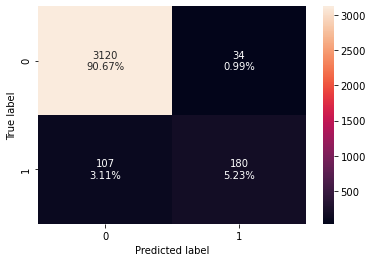

<IPython.core.display.Javascript object>

In [101]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

 - Confusion matrix with the following values:
  - True Positives: 90.67%
  - True Negatives:  5.23%
  - False Positives:  3.11%
  - False Negatives:  .99%

In [102]:
# logistic regression model on Training Performance

log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.959024,0.627178,0.841121,0.718563


<IPython.core.display.Javascript object>

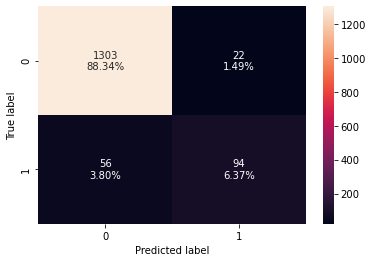

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

 - Confusion matrix with the following values:
  - True Positives: 88.34%
  - True Negatives:  6.37%
  - False Positives:  3.80%
  - False Negatives:  1.49%

In [104]:
# logistic regression model for test set

log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.947119,0.626667,0.810345,0.706767


<IPython.core.display.Javascript object>

#### <font color=black>**ROC-AUC**</font>

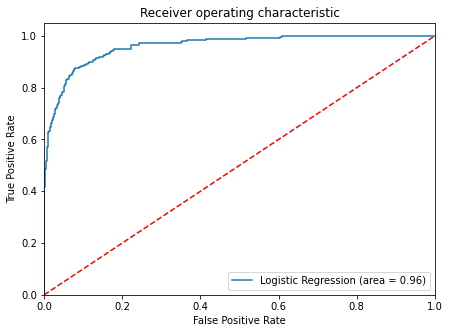

<IPython.core.display.Javascript object>

In [105]:
# logistic regression ROC_AUC curve on training set

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- ROC-AUC on training set

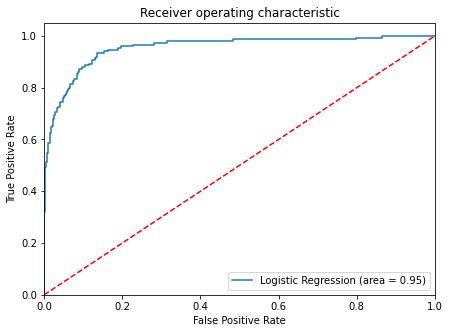

<IPython.core.display.Javascript object>

In [106]:
# logistic regression ROC_AUC curve on testing set

logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- ROC-AUC on testing set

- Model is giving a generalized performance

#### <font color=black>**Optimum Threshold using ROC-AUC**</font>

In [107]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.13213451900988002


<IPython.core.display.Javascript object>

- Optimum threshold using ROC-AUC is .13

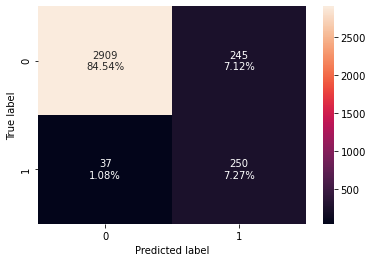

<IPython.core.display.Javascript object>

In [108]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

 - Confusion matrix with the following values:
  - True Positives: 84.54%
  - True Negatives:  7.27%
  - False Positives:  1.08%
  - False Negatives:  7.12%

In [109]:
# checking model performance for this model

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.918047,0.87108,0.505051,0.639386


<IPython.core.display.Javascript object>

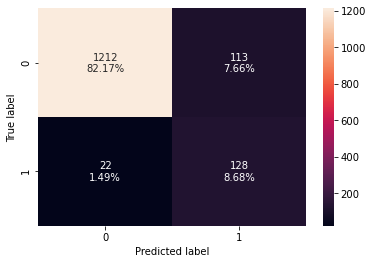

<IPython.core.display.Javascript object>

In [110]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

 - Confusion matrix with the following values:
  - True Positives: 82.17%
  - True Negatives:  8.68%
  - False Positives:  1.49%
  - False Negatives:  7.66%

In [111]:
# checking model performance for this model

log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.908475,0.853333,0.53112,0.654731


<IPython.core.display.Javascript object>

- The F1 score has decreased from .71 to .65 using the ROC-AUC optimum threshold.

#### <font color=black>**Precision-Recall Curve**</font>

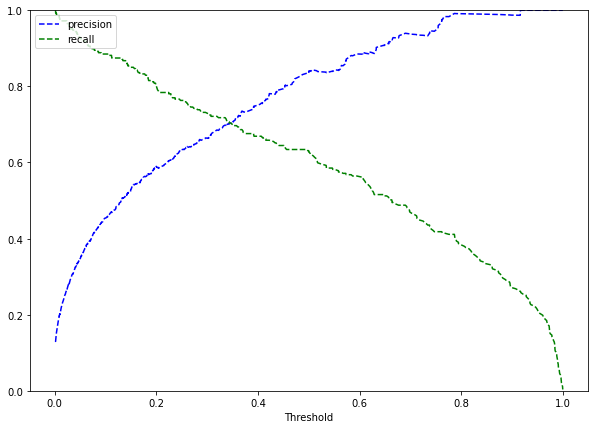

<IPython.core.display.Javascript object>

In [112]:
# plotting precision and recall vs threshold

y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [113]:
# setting the threshold

optimal_threshold_curve = 0.38

<IPython.core.display.Javascript object>

- Optimum threshold for Precision-Recall Curve is .38

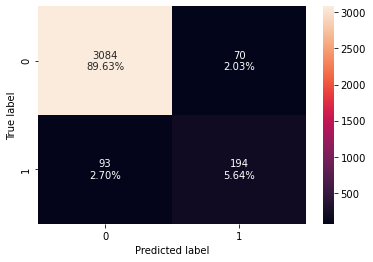

<IPython.core.display.Javascript object>

In [114]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

 - Confusion matrix with the following values:
  - True Positives: 89.63%
  - True Negatives:  5.64%
  - False Positives:  2.70%
  - False Negatives:  2.03%

In [115]:
# training performance on threshold curve

log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95263,0.675958,0.734848,0.704174


<IPython.core.display.Javascript object>

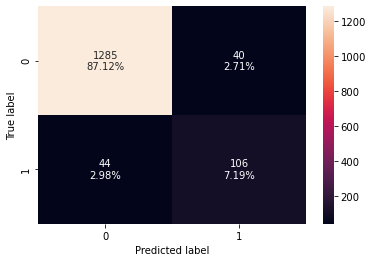

<IPython.core.display.Javascript object>

In [116]:
# creating confusion matrix

confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

 - Confusion matrix with the following values:
  - True Positives: 87.12%
  - True Negatives:  7.19%
  - False Positives:  2.98%
  - False Negatives:  2.71%

In [117]:
# testing performance on threshold curve

log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.943051,0.706667,0.726027,0.716216


<IPython.core.display.Javascript object>

- We have improved our model by a slight margin.  The F1 score of new Precision-Recall model is .72 while the logistic regression model F1 score is .71.

#### <font color=black>**Sequential Feature Selector**</font>

In [118]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

<IPython.core.display.Javascript object>

In [119]:
# Fit the model on train

model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

<IPython.core.display.Javascript object>

In [120]:
# we will first build model with all varaible

sfs = SFS(
    model,
    k_features=30,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    2.0s finished

[2021-08-06 19:28:43] Features: 1/30 -- score: 0.3605605243967271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.5s finished

[2021-08-06 19:28:43] Features: 2/30 -- score: 0.6130038709116761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2021-08-06 19:28:44] Features: 3/30 -- score: 0.6509292289235544[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2021-08-06 19:28:44] Features: 4/30 -- score: 0.6534049478342381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent 

[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished

[2021-08-06 19:28:56] Features: 29/30 -- score: 0.6855154160543382[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished

[2021-08-06 19:28:56] Features: 30/30 -- score: 0.6803839249233731

<IPython.core.display.Javascript object>

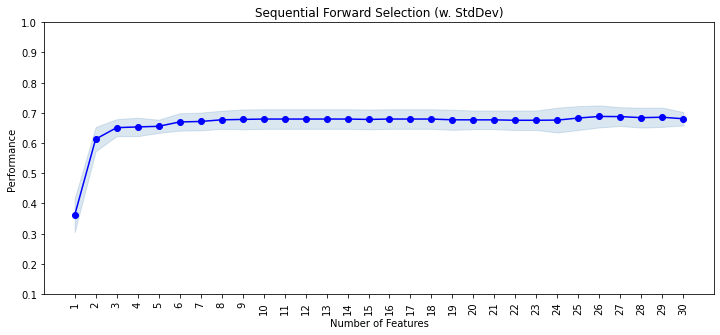

<IPython.core.display.Javascript object>

In [121]:
# plotting sequential forward selection

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_dev", figsize=(12, 5))
plt.ylim([0.1, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.xticks(rotation=90)
plt.show()

- We can see that performance increases till the 6th feature and then became constant.
- So we'll use 6 features only to build our model but the choice of k_features it depends on the business context and use case of the model.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2021-08-06 19:28:57] Features: 1/6 -- score: 0.3605605243967271[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.6s finished

[2021-08-06 19:28:57] Features: 2/6 -- score: 0.6130038709116761[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished

[2021-08-06 19:28:58] Features: 3/6 -- score: 0.6509292289235544[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2021-08-06 19:28:58] Features: 4/6 -- score: 0.6534049478342381[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent work

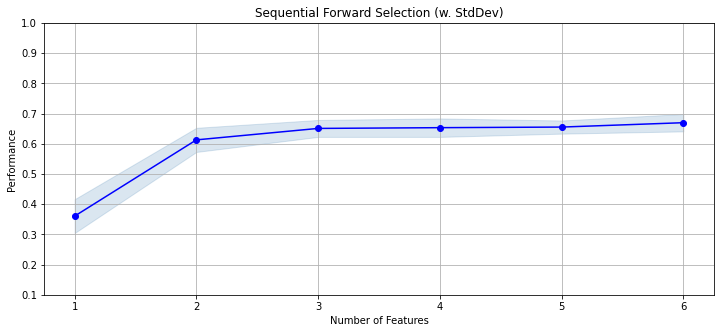

<IPython.core.display.Javascript object>

In [122]:
sfs1 = SFS(
    model,
    k_features=6,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind="std_dev", figsize=(12, 5))

plt.ylim([0.1, 1])
plt.title("Sequential Forward Selection (w. StdDev)")
plt.grid()
plt.show()

In [123]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 3, 5, 8, 10, 14]


<IPython.core.display.Javascript object>

- Important features are 2, 3, 4, 5, 8, 27.

In [124]:
X_train.columns[feat_cols]

Index(['Income', 'Family', 'Education', 'CD_Account', 'CreditCard',
       'City_Monterey_County'],
      dtype='object')

<IPython.core.display.Javascript object>

- Best 6 variables.

In [125]:
# Creating new x_test with the same variables that we selected for x_train

X_train_final = X_train[X_train.columns[feat_cols]]
X_test_final = X_test[X_train_final.columns]

<IPython.core.display.Javascript object>

In [126]:
# Fitting logistic regession model

logreg = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=0
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

<IPython.core.display.Javascript object>

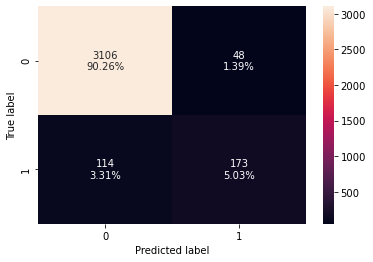

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn_with_threshold(logreg, X_train_final, y_train)

 - Confusion matrix with the following values:
  - True Positives: 90.26%
  - True Negatives:  4.88%
  - False Positives:  3.46%
  - False Negatives:  1.39%

In [128]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_train_final, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


,Accuracy,Recall,Precision,F1
0,0.952921,0.602787,0.782805,0.681102


<IPython.core.display.Javascript object>

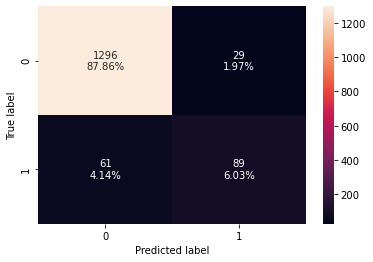

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn_with_threshold(logreg, X_test_final, y_test)

 - Confusion matrix with the following values:
  - True Positives: 88.14%
  - True Negatives:  5.90%
  - False Positives:  4.27%
  - False Negatives:  1.69%

In [130]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_test_final, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.938983,0.593333,0.754237,0.664179


<IPython.core.display.Javascript object>

In [131]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_SFS.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
    "Logistic Regression - SFS",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold,Logistic Regression - SFS
Accuracy,0.959024,0.918047,0.952630,0.952921
Recall,0.627178,0.871080,0.675958,0.602787
Precision,0.841121,0.505051,0.734848,0.782805
F1,0.718563,0.639386,0.704174,0.681102


<IPython.core.display.Javascript object>

In [132]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_SFS.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.77 Threshold",
    "Logistic Regression-0.58 Threshold",
    "Logistic Regression - SFS",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.77 Threshold,Logistic Regression-0.58 Threshold,Logistic Regression - SFS
Accuracy,0.947119,0.908475,0.943051,0.938983
Recall,0.626667,0.853333,0.706667,0.593333
Precision,0.810345,0.531120,0.726027,0.754237
F1,0.706767,0.654731,0.716216,0.664179


<IPython.core.display.Javascript object>

## <font color=Orange>**Logistic Regression Conclusion**</font>

- We have been able to build a predictive model that can be used by the All Life Bank to determine if customer will accept personal loan with an f1_score of 0.72 on the training set and formulate policies accordingly.
- We found that Income,Family, CCAvg, Education, CD_Account, City_Santa_Clara_County are important features.
- Positive coefficient columns: Experience, Income, Family, CCAvg, Educatino, Mortgage, CD_Account and some City columns. Increase in these will increase the chance the customer will accept personal loan.
- Negative coefficient columns: Age, Securities_Account, Online, Credit Card and some City columns. Increase in these will decrease the chance person accepts personal loan.

## <font color=green>**MODEL BUILDING - DECISION TREE**</font>

### <font color=Blue>**Fuctions to Define Recall Score and Confusion Matrix**</font>

In [133]:
# Function to calculate recall score


def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [134]:
# function to create confusion matrix


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### <font color=Blue>**Creating the Decision Tree**</font>

In [135]:
# defining model as DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [136]:
# fitting model

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

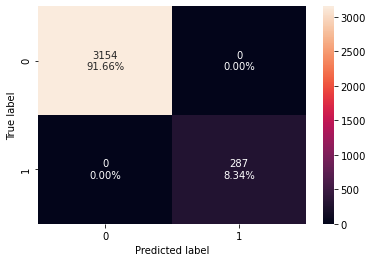

<IPython.core.display.Javascript object>

In [137]:
# creating confusion matrix

confusion_matrix_sklearn(model, X_train, y_train)

 - Confusion matrix with the following values:
  - True Positives: 91.66%
  - True Negatives:  8,43%
  - False Positives:  0.00%
  - False Negatives:  0.00%

- Model is able to perfectly classify all the data points on the training set.
- 0 errors on the training set, each sample has been classified correctly.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
- This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

In [138]:
# recall score on training set

decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

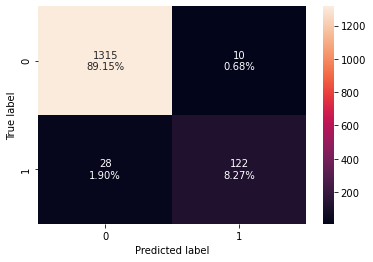

<IPython.core.display.Javascript object>

In [139]:
# build confusion matrix

confusion_matrix_sklearn(model, X_test, y_test)

 - Confusion matrix with the following values:
  - True Positives: 89.15%
  - True Negatives:  8.27%
  - False Positives:  1.90%
  - False Negatives:  .68%

In [140]:
# recall on testing set

decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8133333333333334


<IPython.core.display.Javascript object>

- There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### <font color=Blue>**Visualizing the Decision Tree**</font>

In [141]:
# creating a list of column names

feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

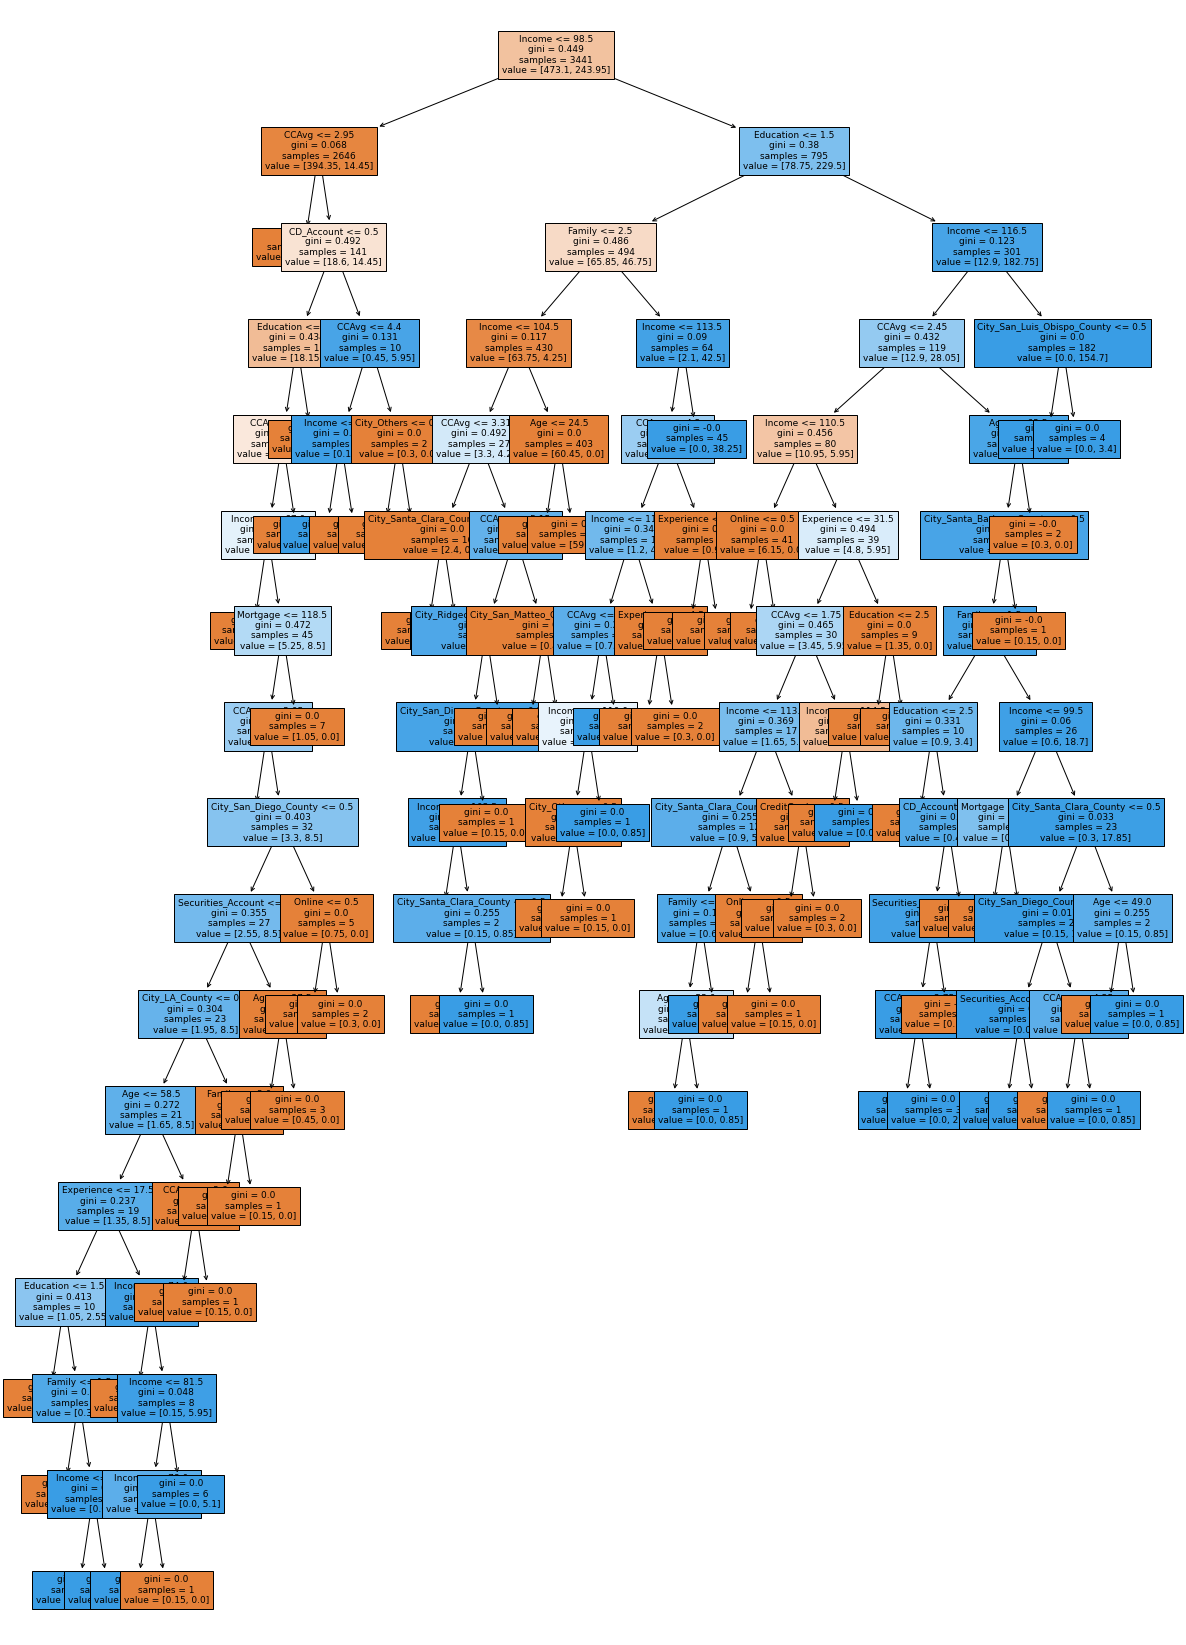

<IPython.core.display.Javascript object>

In [142]:
# decision tree specifications

plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [143]:
# Text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [375.75, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Education <= 2.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Income <= 67.00
|   |   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |   |--- Income >  67.00
|   |   |   |   |   |   |--- Mortgage <= 118.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- City_San_Diego_County <= 0.50
|   |   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- City_LA_County <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- City_LA_County >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   

<IPython.core.display.Javascript object>

- The tree above is very complex and difficult to interpret.

In [144]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                      Imp
Income                       6.118738e-01
Family                       1.361857e-01
Education                    1.314236e-01
CCAvg                        8.122999e-02
CD_Account                   1.353593e-02
Age                          5.918093e-03
Mortgage                     4.076731e-03
Experience                   3.781134e-03
City_San_Diego_County        3.554421e-03
Securities_Account           3.224977e-03
City_Santa_Clara_County      2.326807e-03
City_LA_County               1.269616e-03
City_Santa_Barbara_County    8.120745e-04
City_Ridgecrest_County       7.871464e-04
City_San_Luis_Obispo_County  2.240864e-15
Online                       2.845312e-17
CreditCard                   1.293324e-17
City_San_Matteo_County       6.207953e-18
City_Others                  5.173294e-18
City_Riverside_County        0.000000e+00
City_Sacramento_County       0.000000e+00
City_San_Bernardino_County   0.000000e+00
City_Placer_County           0.000

<IPython.core.display.Javascript object>

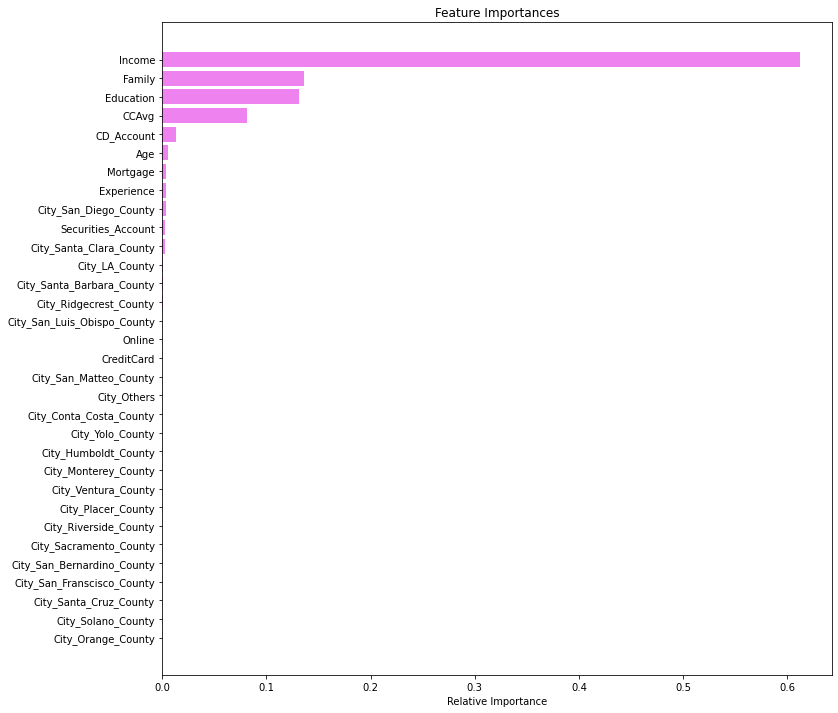

<IPython.core.display.Javascript object>

In [145]:
# plot graph of feature importances

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Important features are Income, Family, Education, CCAvg

### <font color=Blue>**GridSearch for Hyperparameter Tuning**</font>

In [146]:
# Choose the type of classifier.

estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations

scorer = make_scorer(recall_score)

# Run the grid search

grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters

estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.

estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

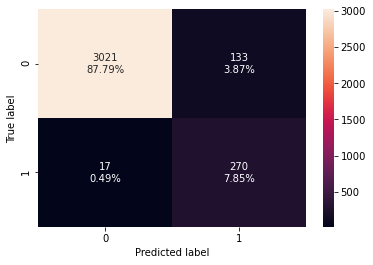

<IPython.core.display.Javascript object>

In [147]:
# build confusion matrix

confusion_matrix_sklearn(estimator, X_train, y_train)

 - Confusion matrix with the following values:
  - True Positives: 87.79%
  - True Negatives:  7.85%
  - False Positives:  0.49%
  - False Negatives:  3.87%

In [148]:
# recall score on training data

decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9407665505226481


<IPython.core.display.Javascript object>

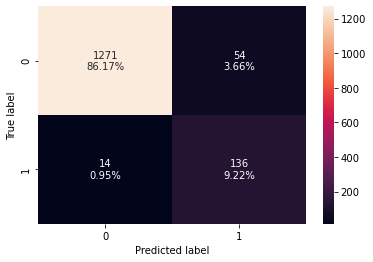

<IPython.core.display.Javascript object>

In [149]:
# build confusion matrix

confusion_matrix_sklearn(estimator, X_test, y_test)

 - Confusion matrix with the following values:
  - True Positives: 86.17%
  - True Negatives:  9.22%
  - False Positives:  0.95%
  - False Negatives:  3.66%

In [150]:
# recall score on test data

decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9066666666666666


<IPython.core.display.Javascript object>

- The model is giving a generalized result now.

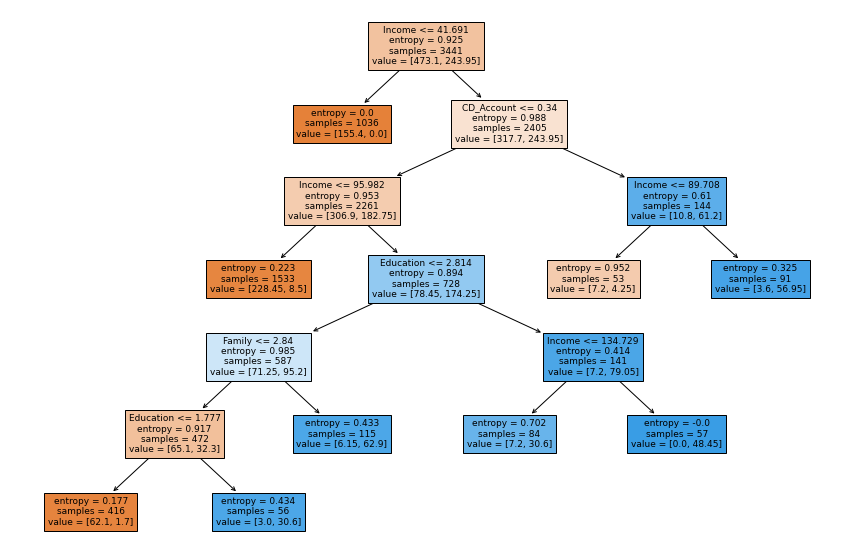

<IPython.core.display.Javascript object>

In [151]:
# plot decision tree with certain specifications

plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [152]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 41.69
|   |--- weights: [155.40, 0.00] class: 0
|--- Income >  41.69
|   |--- CD_Account <= 0.34
|   |   |--- Income <= 95.98
|   |   |   |--- weights: [228.45, 8.50] class: 0
|   |   |--- Income >  95.98
|   |   |   |--- Education <= 2.81
|   |   |   |   |--- Family <= 2.84
|   |   |   |   |   |--- Education <= 1.78
|   |   |   |   |   |   |--- weights: [62.10, 1.70] class: 0
|   |   |   |   |   |--- Education >  1.78
|   |   |   |   |   |   |--- weights: [3.00, 30.60] class: 1
|   |   |   |   |--- Family >  2.84
|   |   |   |   |   |--- weights: [6.15, 62.90] class: 1
|   |   |   |--- Education >  2.81
|   |   |   |   |--- Income <= 134.73
|   |   |   |   |   |--- weights: [7.20, 30.60] class: 1
|   |   |   |   |--- Income >  134.73
|   |   |   |   |   |--- weights: [0.00, 48.45] class: 1
|   |--- CD_Account >  0.34
|   |   |--- Income <= 89.71
|   |   |   |--- weights: [7.20, 4.25] class: 0
|   |   |--- Income >  89.71
|   |   |   |--- weights: [3.60, 56.95] class: 1


<IPython.core.display.Javascript object>

- Decision tree which allows us to determine which values correlated to one another giving an output of whether or not the customer will accept the loan. 
- For example Income > CD_Account > Income > Education > Family > Education

In [153]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                  Imp
Income                       0.641542
Education                    0.179955
Family                       0.089971
CD_Account                   0.088531
Age                          0.000000
City_San_Matteo_County       0.000000
City_Sacramento_County       0.000000
City_San_Bernardino_County   0.000000
City_San_Diego_County        0.000000
City_San_Franscisco_County   0.000000
City_San_Luis_Obispo_County  0.000000
City_Santa_Clara_County      0.000000
City_Santa_Barbara_County    0.000000
City_Ridgecrest_County       0.000000
City_Santa_Cruz_County       0.000000
City_Solano_County           0.000000
City_Ventura_County          0.000000
City_Riverside_County        0.000000
City_Others                  0.000000
City_Placer_County           0.000000
Experience                   0.000000
City_Orange_County           0.000000
City_Monterey_County         0.000000
City_LA_County               0.000000
City_Humboldt_County         0.000000
City_Conta_C

<IPython.core.display.Javascript object>

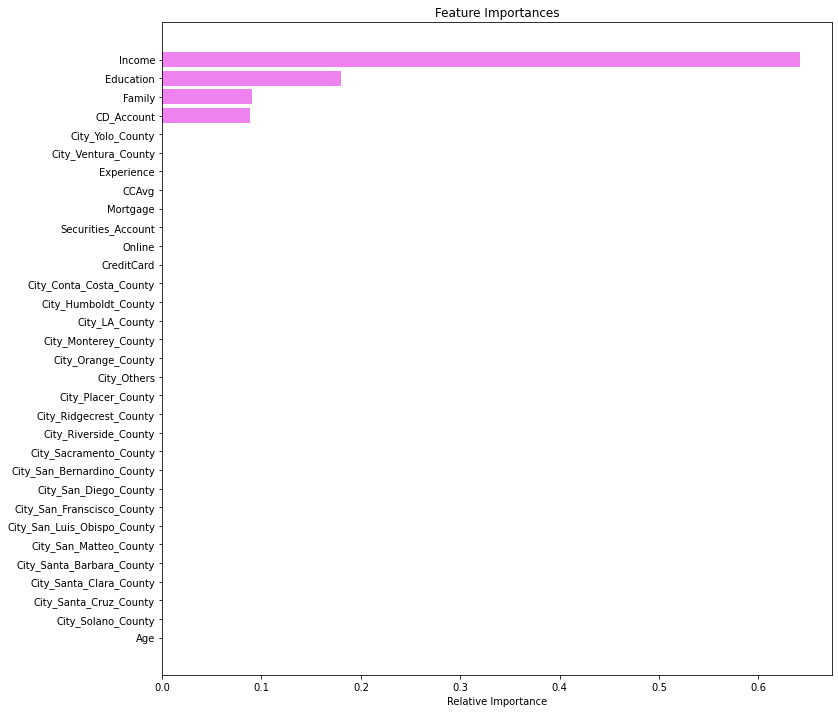

<IPython.core.display.Javascript object>

In [154]:
# plot graph of feature importances

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Important features are Income, Family, Education, CD_Accounts

### <font color=Blue>**Cost Complexity Pruning**</font>

In [155]:
# creating cost-complexity

clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [156]:
# calcuating alphas and impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.069545e-16
1,4.644961e-19,-3.064900e-16
2,7.896433e-19,-3.057003e-16
3,1.579287e-18,-3.041211e-16
4,1.857984e-18,-3.022631e-16
5,1.857984e-18,-3.004051e-16
6,2.461829e-18,-2.979433e-16
7,2.461829e-18,-2.954814e-16
8,2.786976e-18,-2.926945e-16
9,3.065674e-18,-2.896288e-16


<IPython.core.display.Javascript object>

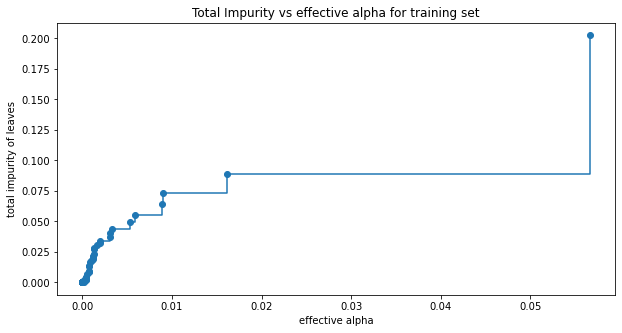

<IPython.core.display.Javascript object>

In [157]:
# plotting impurity vs alpha of training set

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [158]:
# train decision tree using effective alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.24652208302709494


<IPython.core.display.Javascript object>

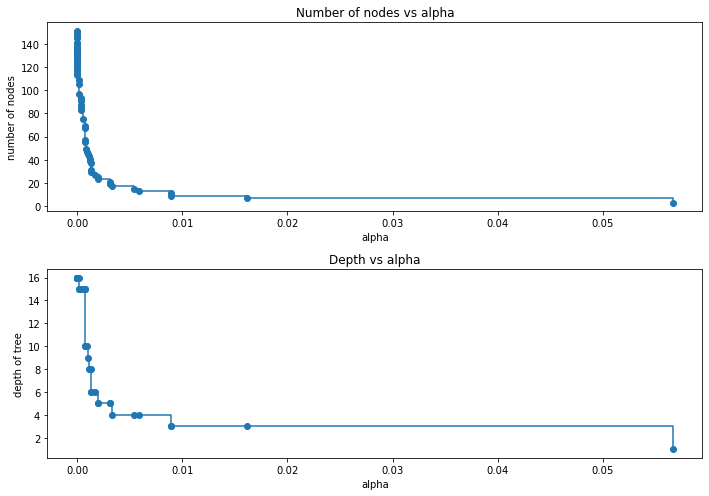

<IPython.core.display.Javascript object>

In [159]:
# remove the last elements of clfs and ccp_alphas

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- Removing the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

In [160]:
# appending values on recall_train

recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [161]:
# appending values on recall_test

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [162]:
# creating train scores and test scores

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

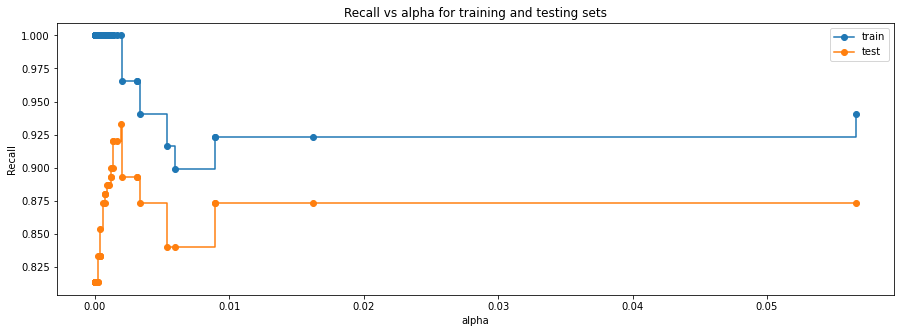

<IPython.core.display.Javascript object>

In [163]:
# plotting recall vs alpha in the training and testing sets

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [164]:
# creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0019418055452043725,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [165]:
# determining best model fit

best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0019418055452043725,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

- Maximum value of Recall is at 0.002 alpha,

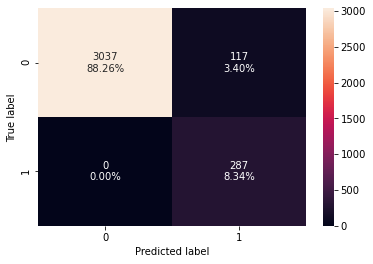

<IPython.core.display.Javascript object>

In [166]:
# building confusion matrix

confusion_matrix_sklearn(best_model, X_train, y_train)

 - Confusion matrix with the following values:
  - True Positives: 88.26%
  - True Negatives:  8.34%
  - False Positives:  0.00%
  - False Negatives:  3.40%

In [167]:
# checking recall score on train data

print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


<IPython.core.display.Javascript object>

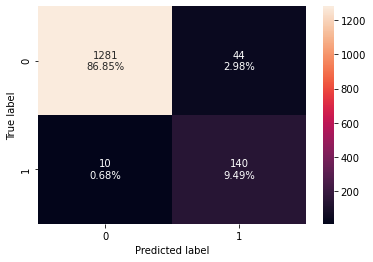

<IPython.core.display.Javascript object>

In [168]:
# build confusion matrix on testing data

confusion_matrix_sklearn(best_model, X_test, y_test)

 - Confusion matrix with the following values:
  - True Positives: 86.85%
  - True Negatives:  9.49%
  - False Positives:  0.68%
  - False Negatives:  2.98%

In [169]:
# recall score on test data

print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9333333333333333


<IPython.core.display.Javascript object>

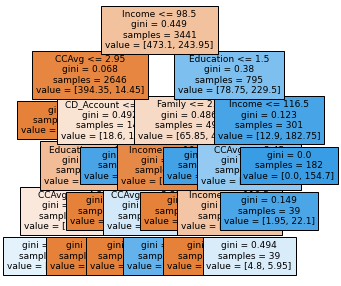

<IPython.core.display.Javascript object>

In [170]:
# creating decision tree with certain specifications

plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

In [171]:
# creating a model with .002 alpha

best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

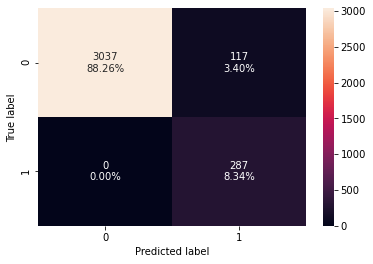

<IPython.core.display.Javascript object>

In [172]:
# build confusion matrix

confusion_matrix_sklearn(best_model2, X_train, y_train)

 - Confusion matrix with the following values:
  - True Positives: 88.26%
  - True Negatives:  8.34%
  - False Positives:  0.00%
  - False Negatives:  3.40%

In [173]:
# recall score on postpruned data

decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

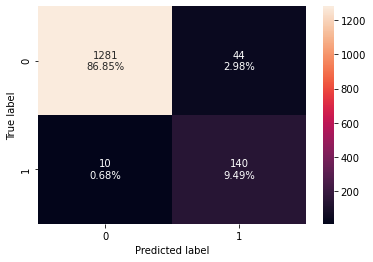

<IPython.core.display.Javascript object>

In [174]:
# build confusion matrix

confusion_matrix_sklearn(best_model2, X_test, y_test)

 - Confusion matrix with the following values:
  - True Positives: 86.85%
  - True Negatives:  9.49%
  - False Positives:  0.68%
  - False Negatives:  2.98%

In [175]:
# testing set recall score

decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9333333333333333


<IPython.core.display.Javascript object>

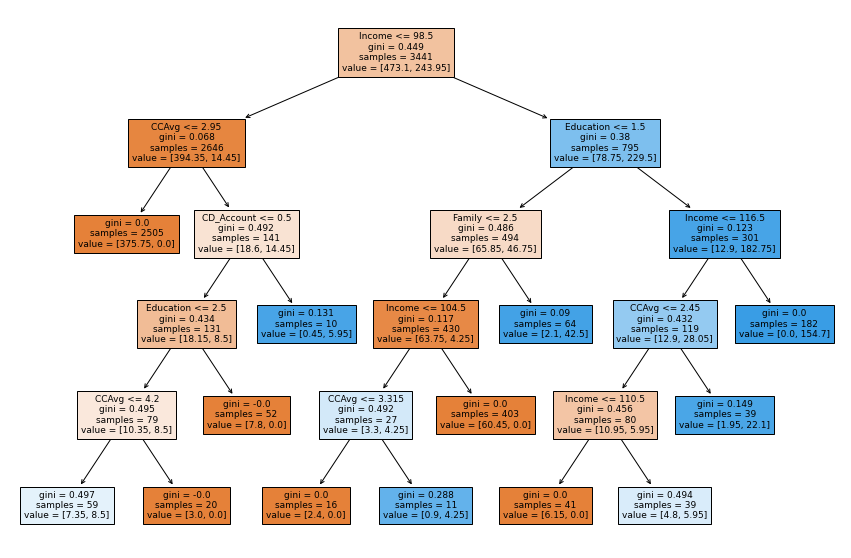

<IPython.core.display.Javascript object>

In [176]:
# plot decision tree using specifications

plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [177]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [375.75, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Education <= 2.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [7.35, 8.50] class: 1
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |--- Education >  2.50
|   |   |   |   |--- weights: [7.80, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.45, 5.95] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |--- weights: [0.90, 4.25] class: 1
|   |   |   |--- Income >  104.50
|   |   |   |   |--- weights: [60.45, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.10, 42.50] class: 1
|   |--- Educat

<IPython.core.display.Javascript object>

In [178]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)


                                  Imp
Income                       0.635349
Family                       0.142933
Education                    0.136301
CCAvg                        0.072533
CD_Account                   0.012884
Age                          0.000000
City_San_Matteo_County       0.000000
City_San_Bernardino_County   0.000000
City_San_Diego_County        0.000000
City_San_Franscisco_County   0.000000
City_San_Luis_Obispo_County  0.000000
City_Santa_Cruz_County       0.000000
City_Santa_Barbara_County    0.000000
City_Santa_Clara_County      0.000000
City_Riverside_County        0.000000
City_Solano_County           0.000000
City_Ventura_County          0.000000
City_Sacramento_County       0.000000
City_Others                  0.000000
City_Ridgecrest_County       0.000000
City_Placer_County           0.000000
Experience                   0.000000
City_Orange_County           0.000000
City_Monterey_County         0.000000
City_LA_County               0.000000
City_Humbold

<IPython.core.display.Javascript object>

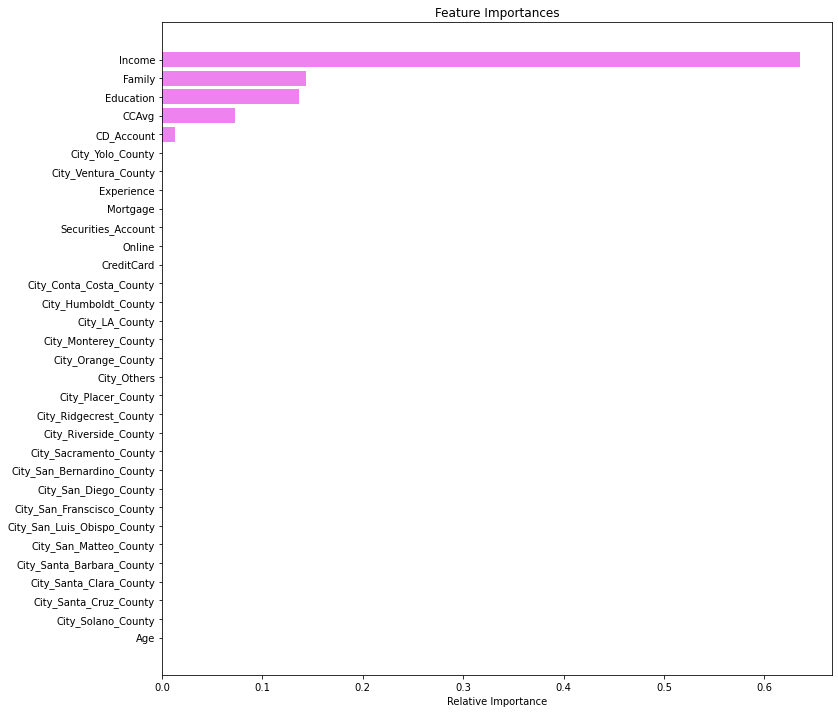

<IPython.core.display.Javascript object>

In [179]:
# plot graph of feature importances

importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- Important features are Income, Family, Education, CCAvg

In [180]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.940767
2,1.000000


<IPython.core.display.Javascript object>

In [181]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.813333
1,0.906667
2,0.933333


<IPython.core.display.Javascript object>

- The decision tree model with post-pruning has given the best recall score on the testing data.
- Pre-prunning and post-pruning models have both reduced overfitting of the data and the model is giving a generalized performance.


## <font color=Orange>**Decision Tree Conclusion**</font>

- Analyzed the whether or not a All Life Bank customer would accept a loan using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to accept a loan or not.
- Visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- Verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
-  Income, Family, Education, CCAvg, and CD_Account are the most important variable in predicting the customers that will accept a loan.
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

## <font color=Orange>**Recommendations (Decsion Tree vs Logistic Regression)**</font>

- According to the decision tree model:
  - If a customer has an income of =< 98.50k you are more likely to accept a loan.
  - If a customer has a credit card monthly income average of 2.95 thousand a month and have an income less than 98.50k you are more likely to accept a loan.
  - A customer has an Income greater than 98.50 thousand but less than 104.50k, an undergrad degree, and a family of two or smaller, the customer is more likely to accept a loan.
  - The most important feature to focus on is the customer's income.  
  - Family, Education, CCAvg, and CD_Account are other important features.
  
- According to logistic regression model:
  - We have been able to build a predictive model that can be used by the All Life Bank to determine if customer will accept personal loan with an f1_score of 0.72 on the training set and formulate policies accordingly.
  - We found that Income,Family, CCAvg, Education, CD_Account, City_Santa_Clara_County are important features.
  - Positive coefficient columns: Experience, Income, Family, CCAvg, Educatino, Mortgage, CD_Account and some City columns. Increase in these will increase the chance the customer will accept personal loan.
  - Negative coefficient columns: Age, Securities_Account, Online, Credit Card and some City columns. Increase in these will decrease the chance person accepts personal loan.


## <font color=Orange>**EDA Analysis on Incorrectly Predicted Values**</font>

- best_model2 is best model created.
- best_model2 has 2.98% false negatives in confusion matrix.
- best_model2 has .068% false postives
- best_model2 has a total of 3.05% incorrectly predicted data.
- There 54 incorrectly predicted values in best_model2.
- There are no patterns between the incorrectly predicted values.

#### <font color=Red>**Created by Stephen Catalfio**</font>